In [1]:
from src.factor import api
rslt = api.fmp_test()

Group optimization of 1 alphas , 3 benchmarks , 3 lags , 12 dates , (108 opts) start!
Done Optimize [factor1.csi300   ] at 20231201 , time cost (ms) : {'parse_input': 12.87, 'solve': 104.3, 'output': 12.12}
Done Optimize [factor1.csi500   ] at 20231201 , time cost (ms) : {'parse_input': 17.4, 'solve': 83.49, 'output': 16.5}
Done Optimize [factor1.csi1000  ] at 20231201 , time cost (ms) : {'parse_input': 26.87, 'solve': 88.93, 'output': 17.61}
Done Optimize [factor1.csi300.1 ] at 20231201 , time cost (ms) : {'parse_input': 16.54, 'solve': 90.55, 'output': 9.48}
Done Optimize [factor1.csi500.1 ] at 20231201 , time cost (ms) : {'parse_input': 16.56, 'solve': 92.1, 'output': 12.23}
Done Optimize [factor1.csi1000.1] at 20231201 , time cost (ms) : {'parse_input': 33.11, 'solve': 83.36, 'output': 12.47}
Done Optimize [factor1.csi300.2 ] at 20231201 , time cost (ms) : {'parse_input': 32.72, 'solve': 88.57, 'output': 17.03}
Done Optimize [factor1.csi500.2 ] at 20231201 , time cost (ms) : {'pars

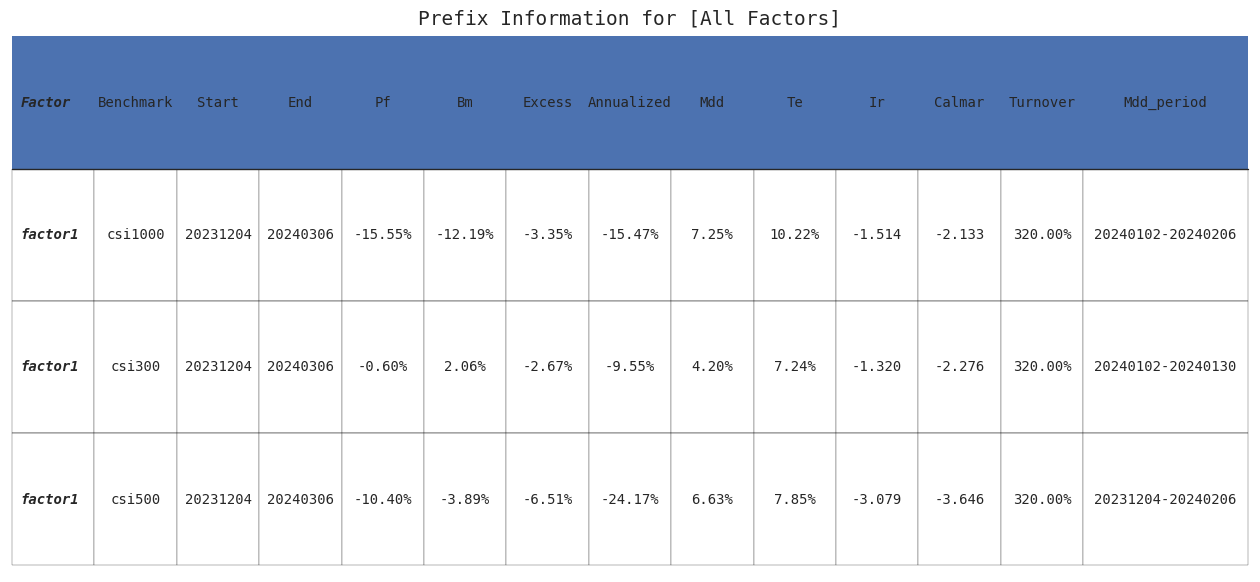

In [5]:
rslt.perf_calc_dict['prefix'].figs['all']

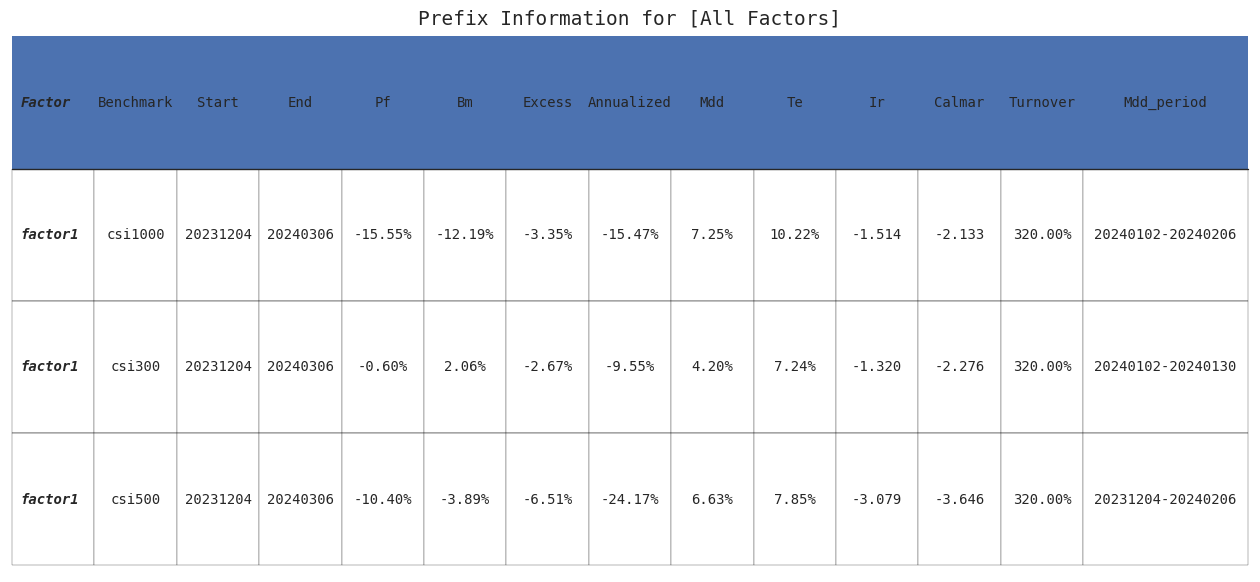

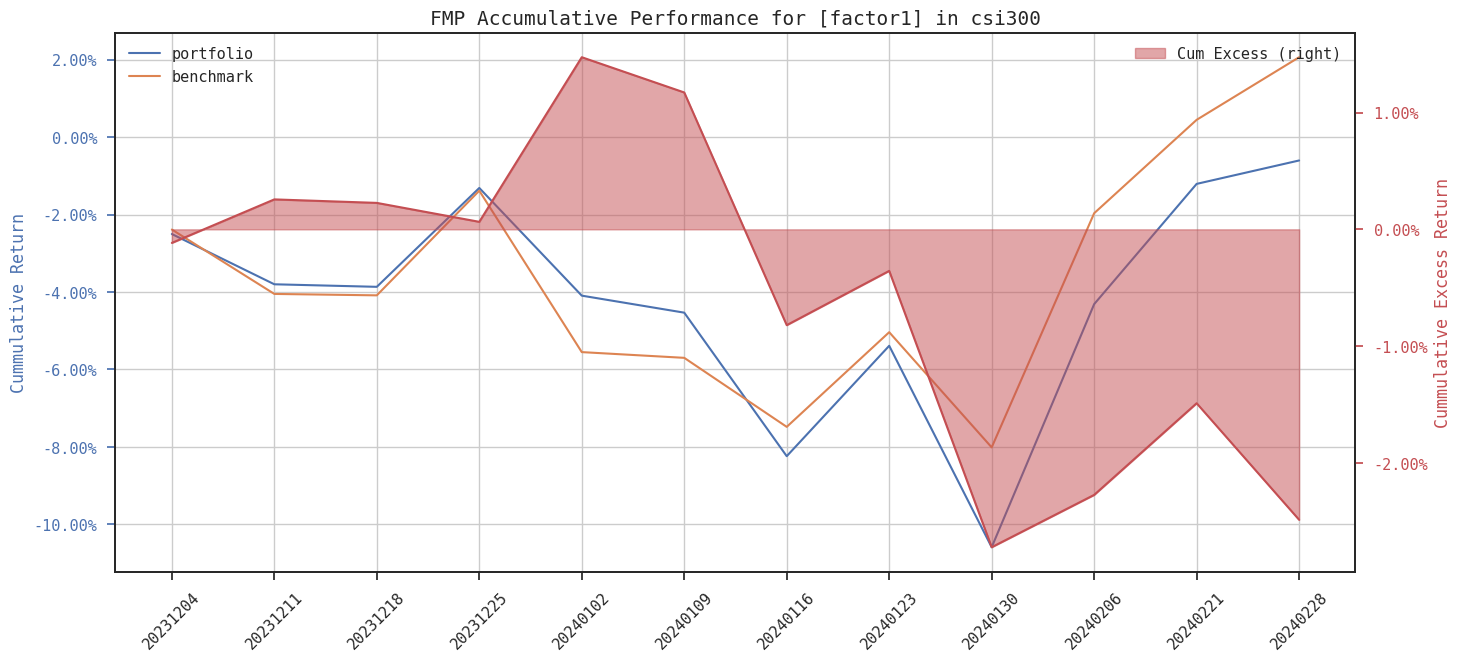

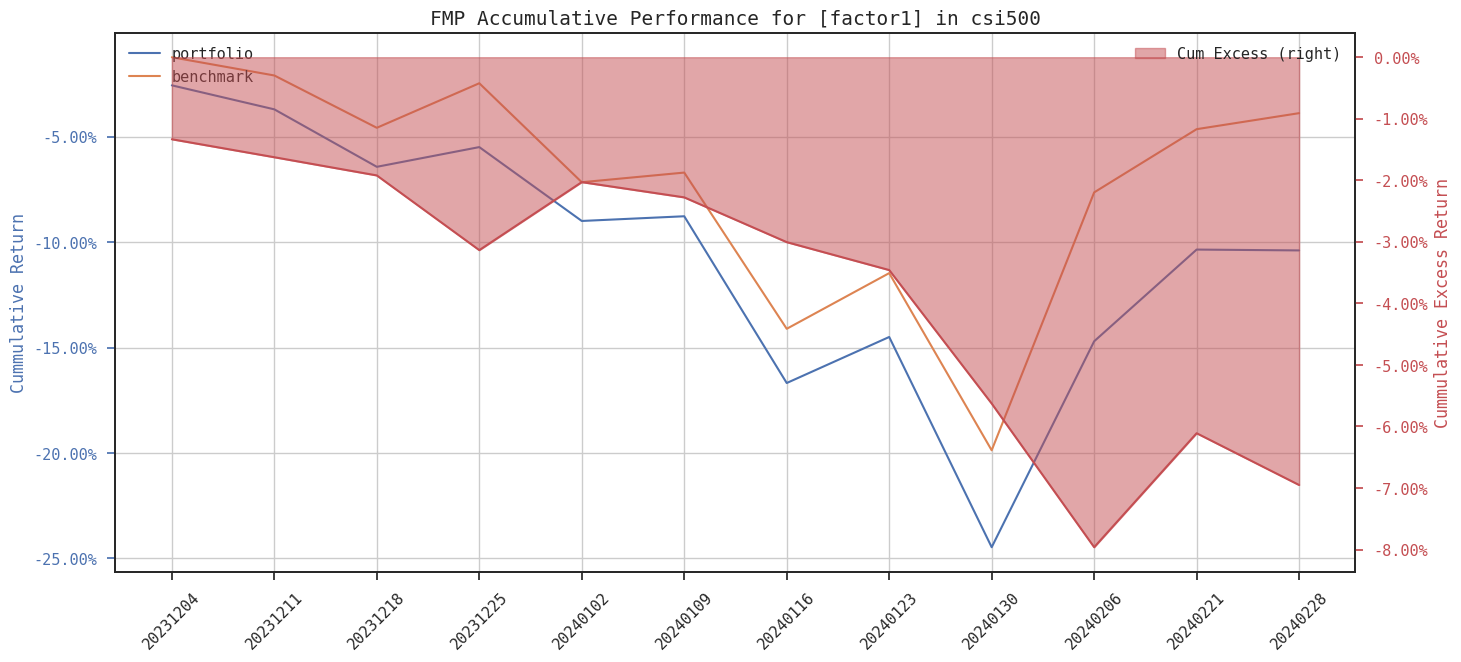

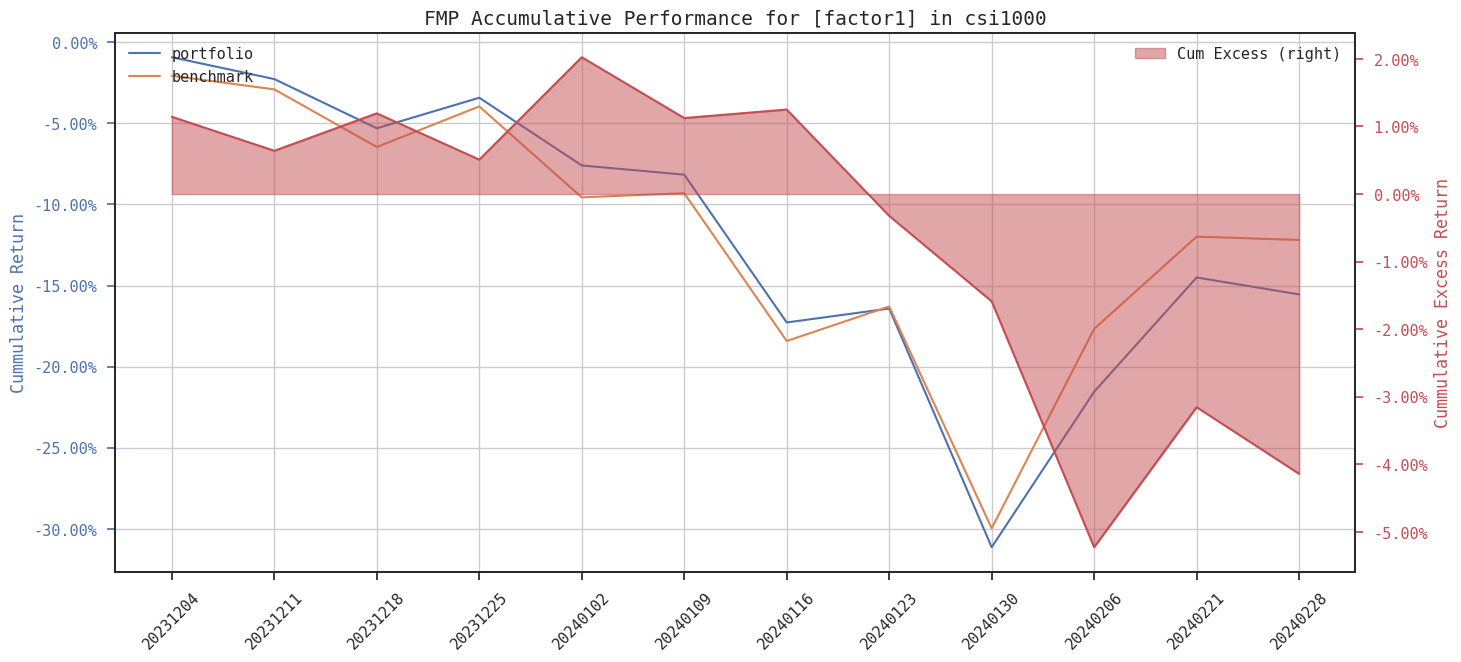

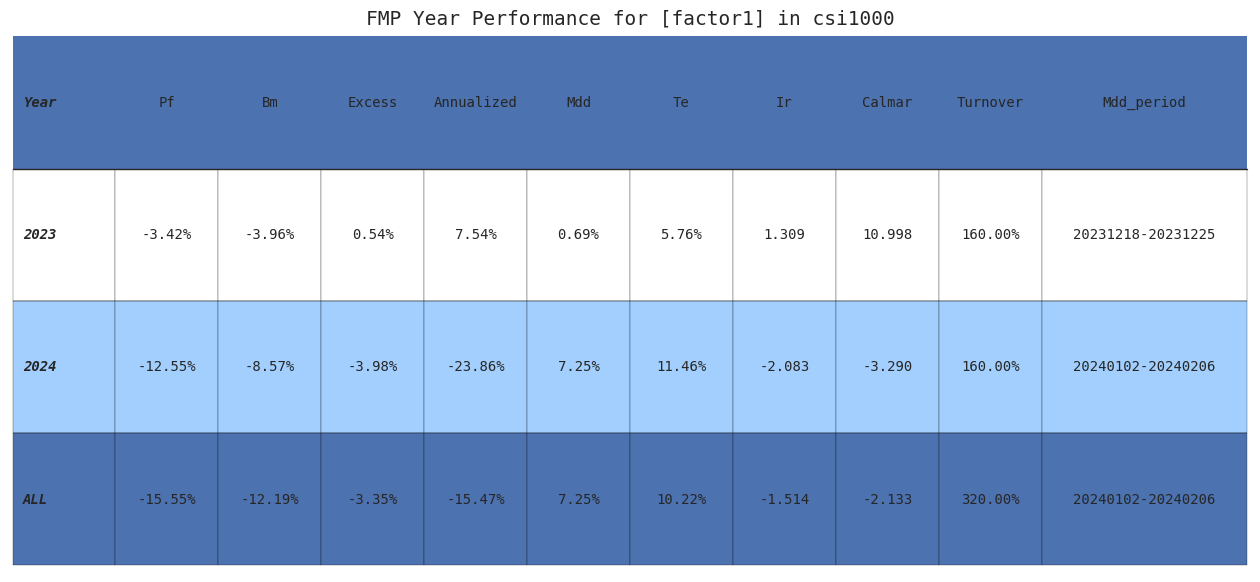

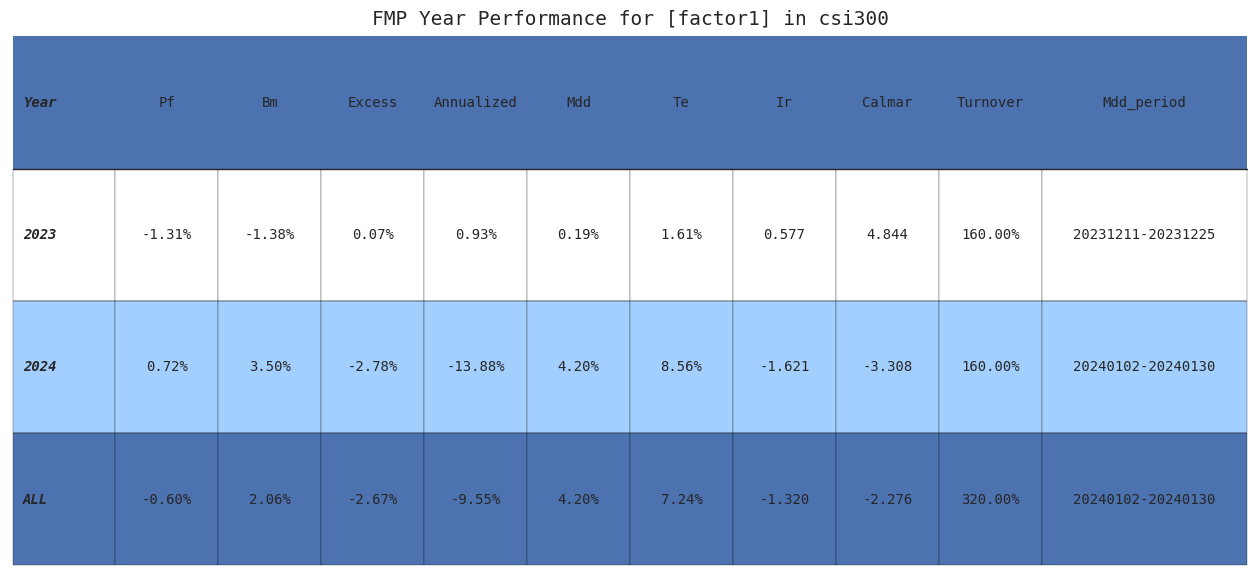

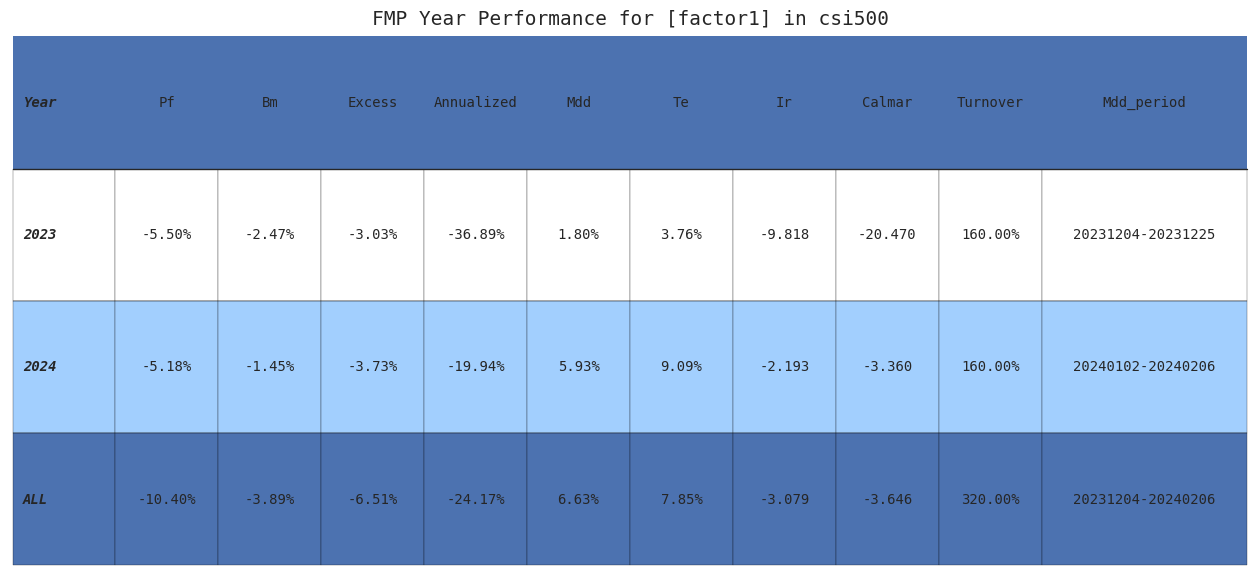

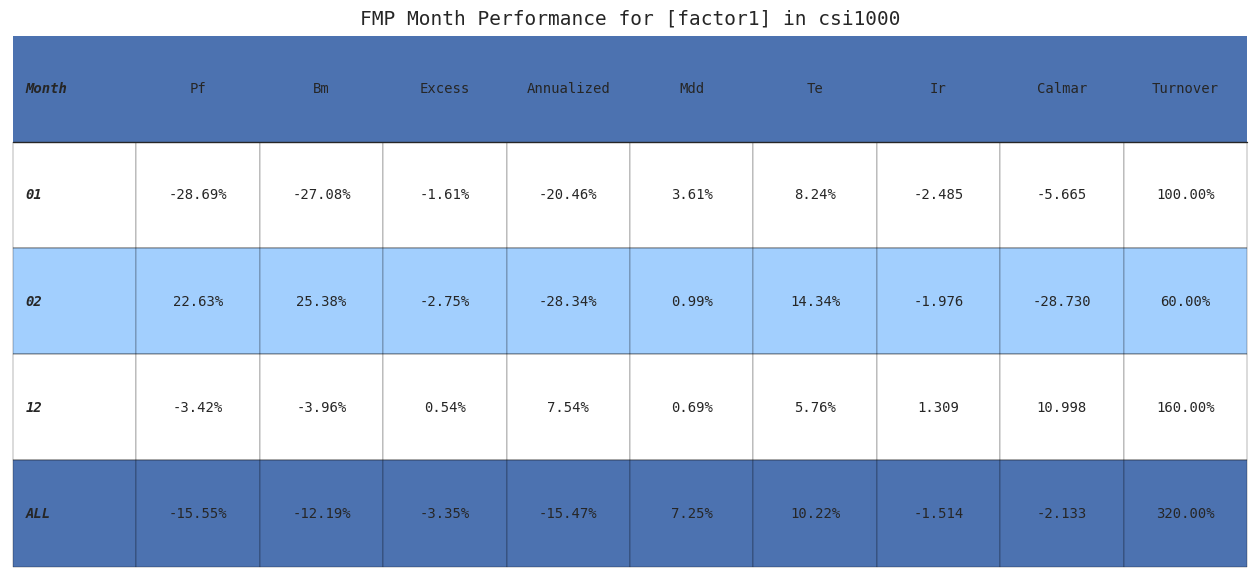

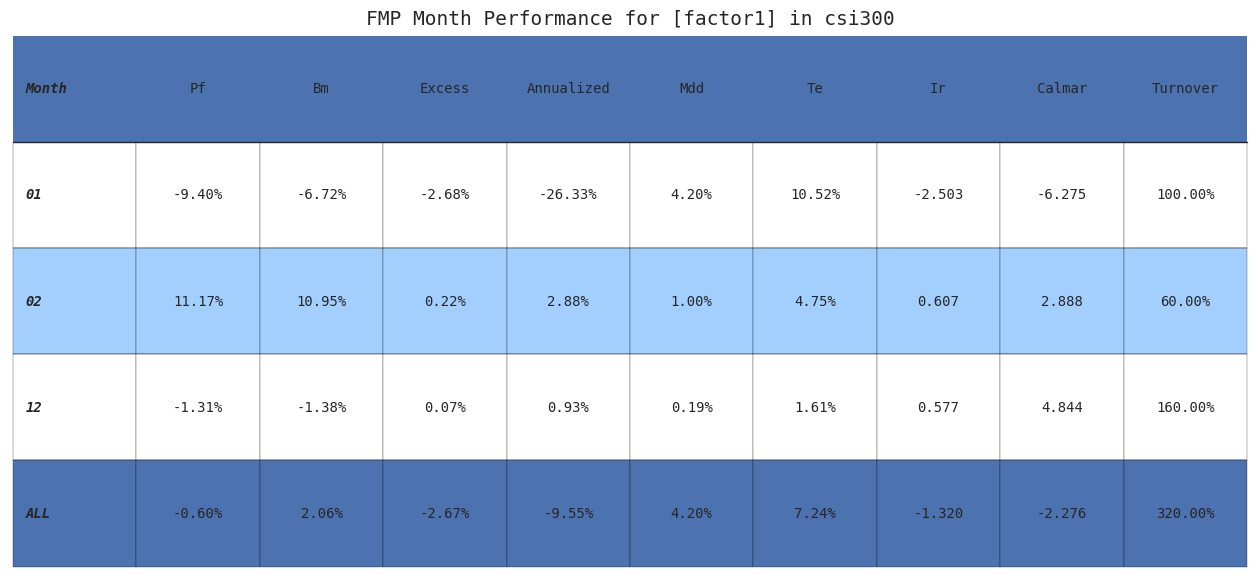

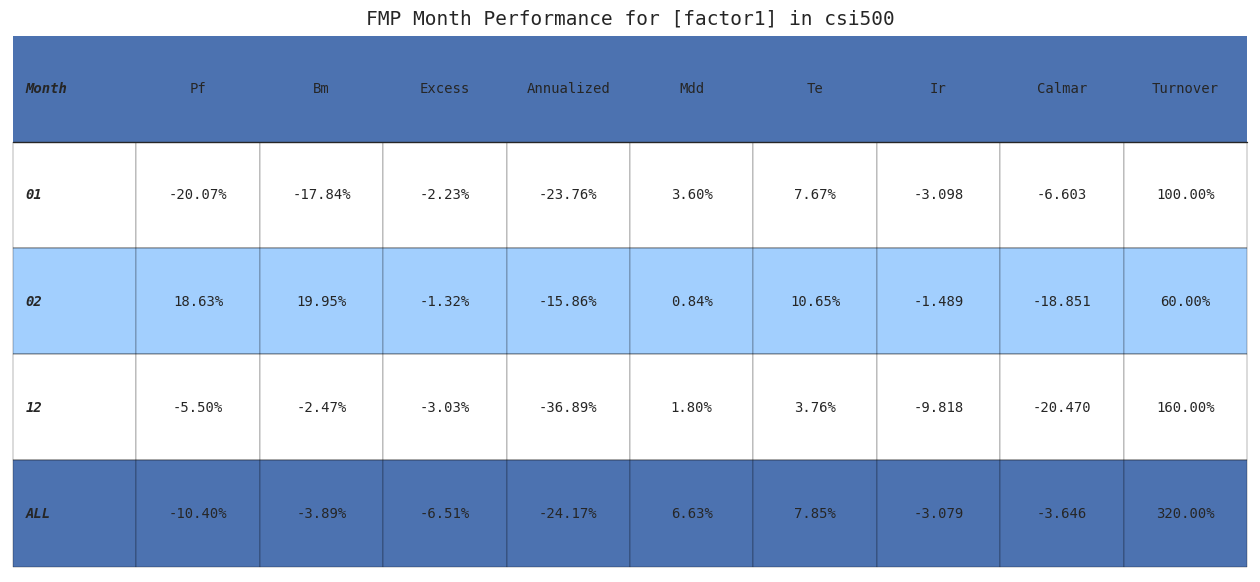

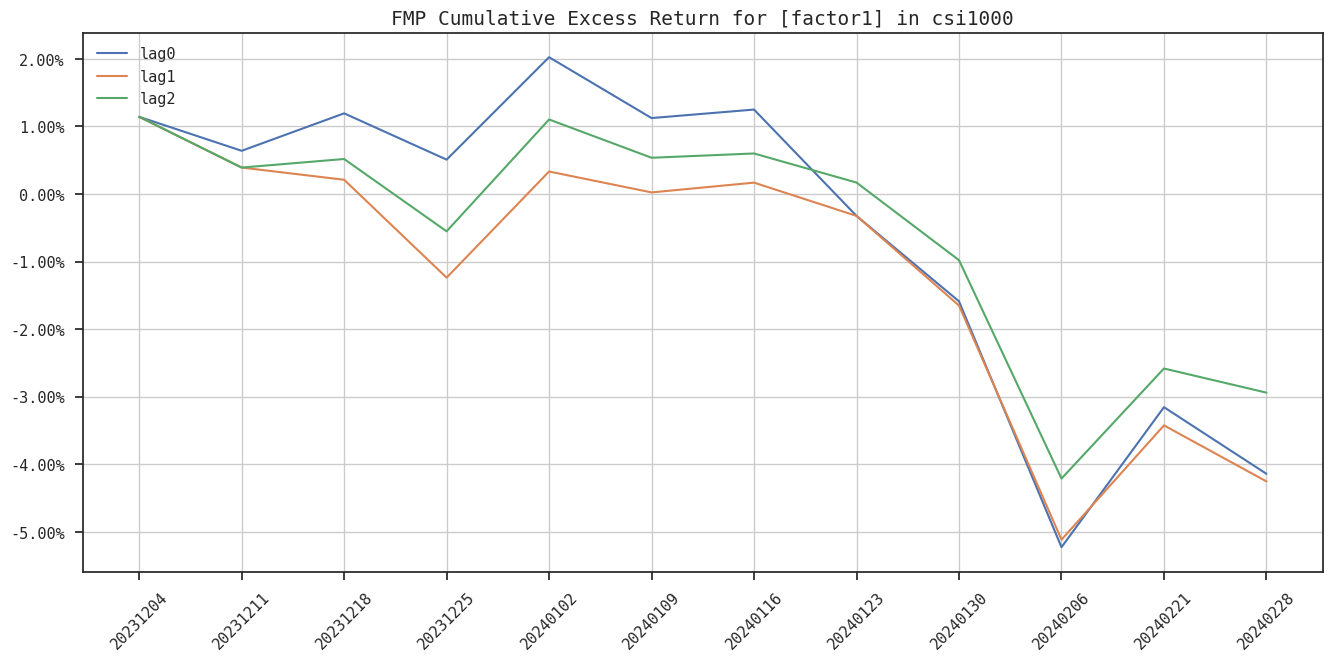

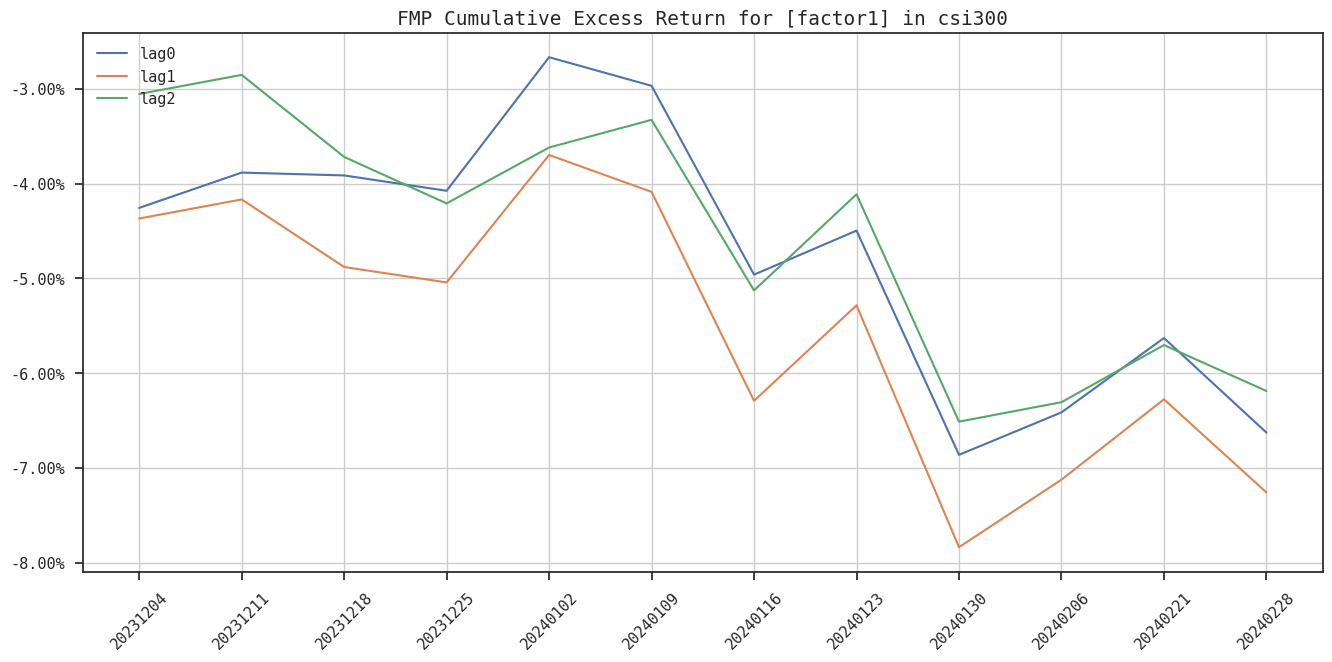

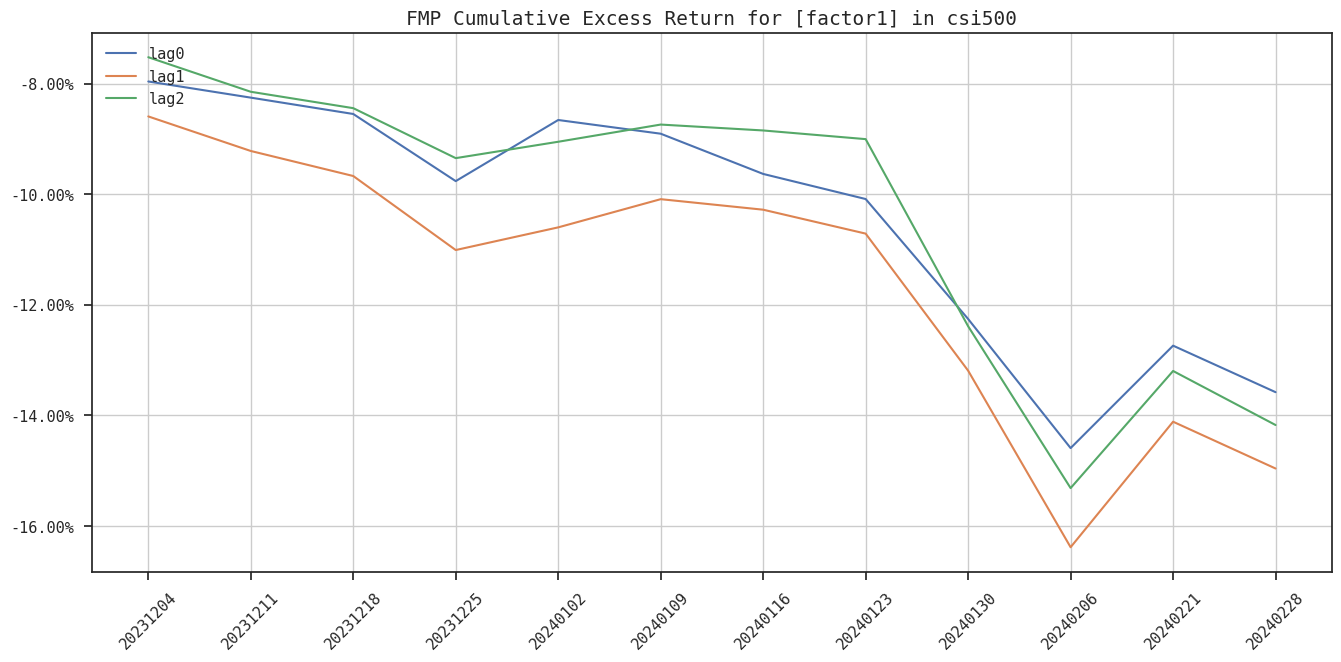

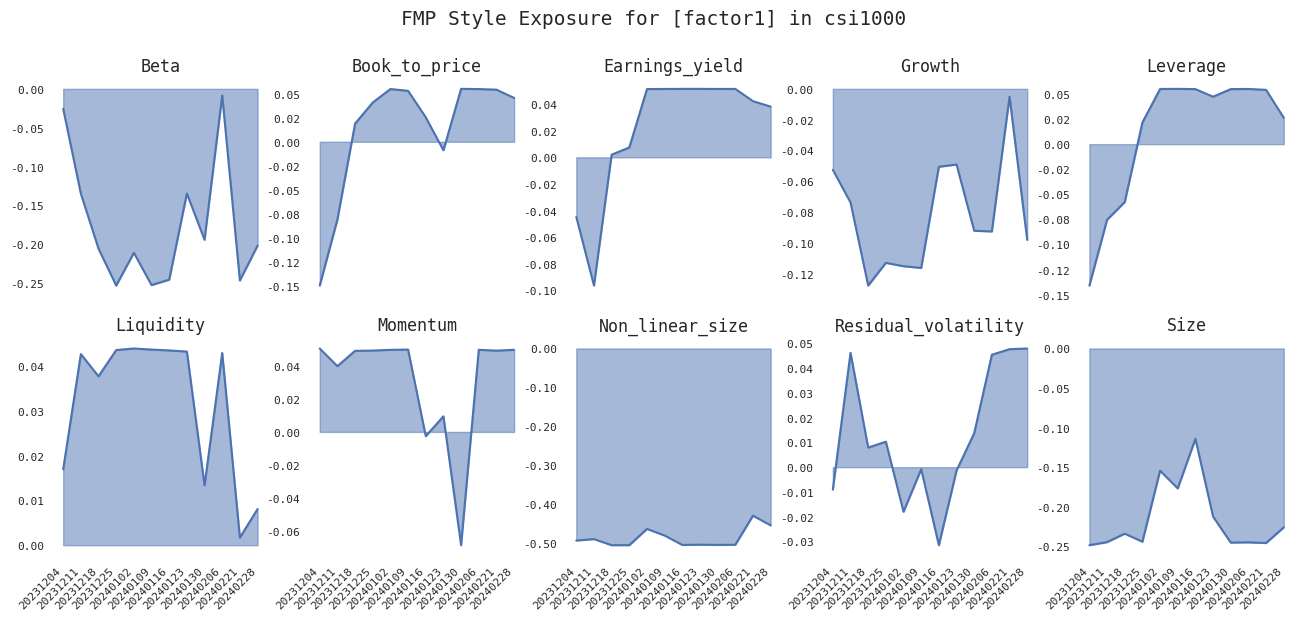

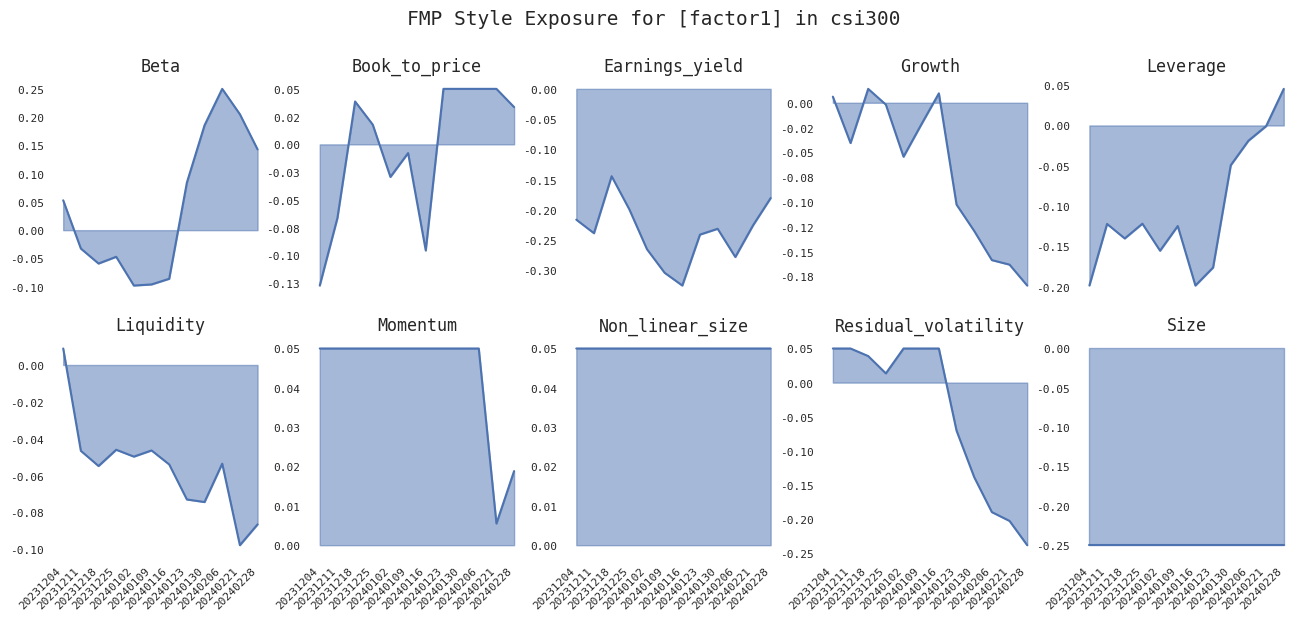

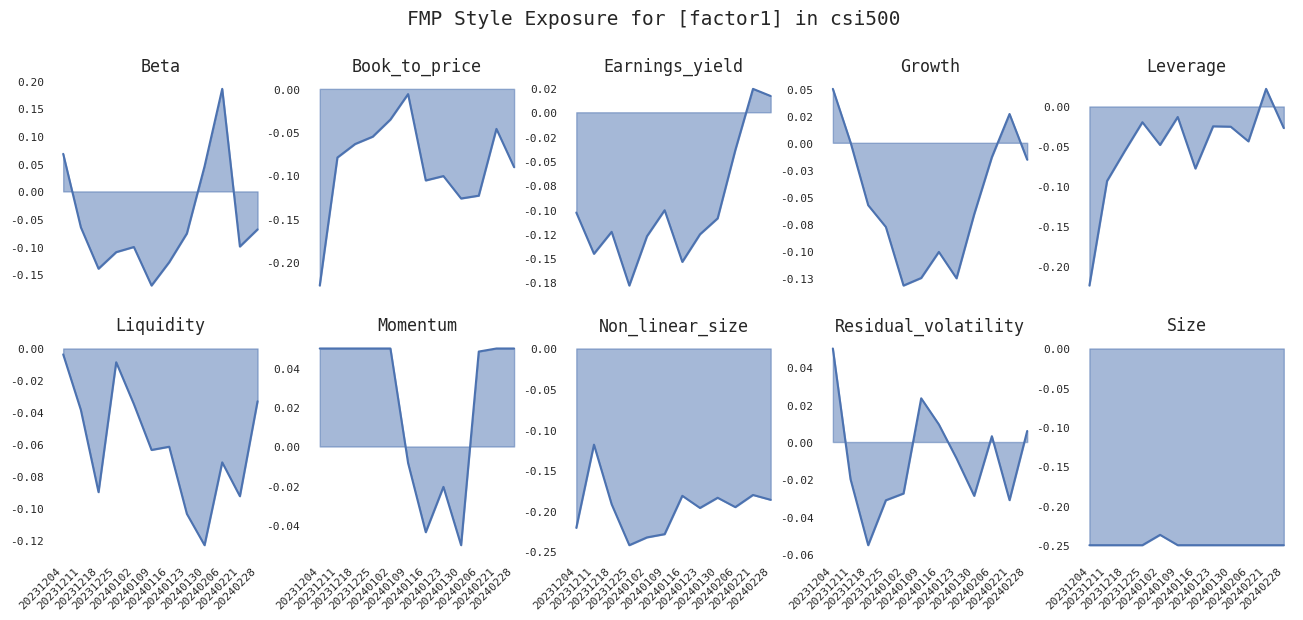

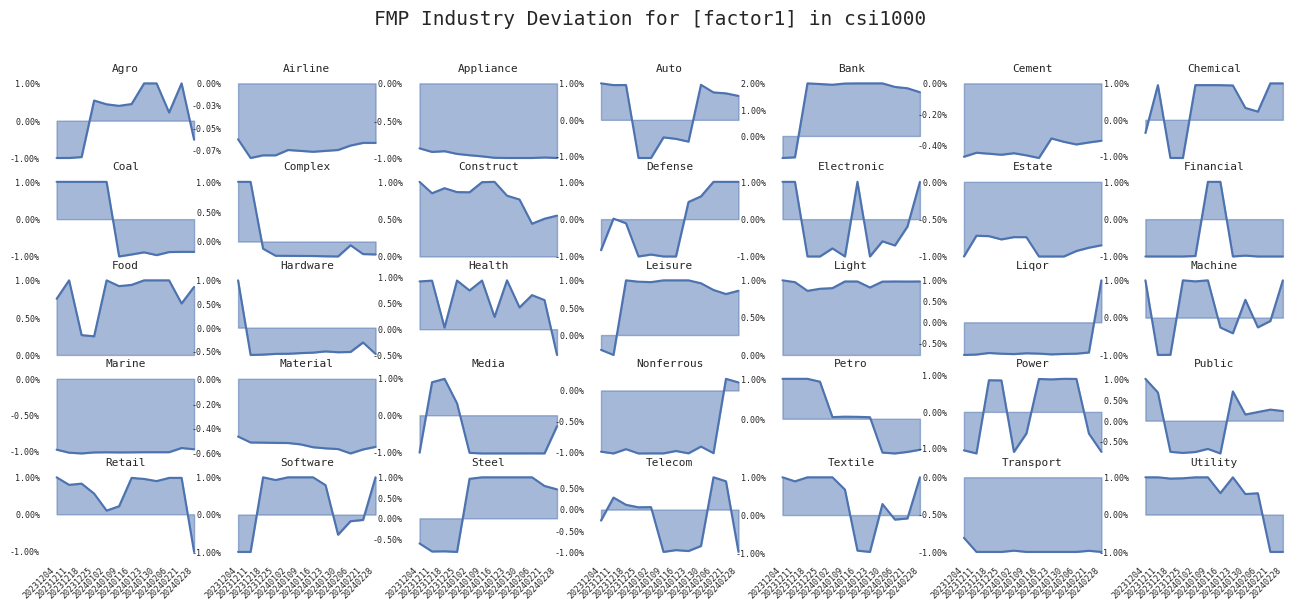

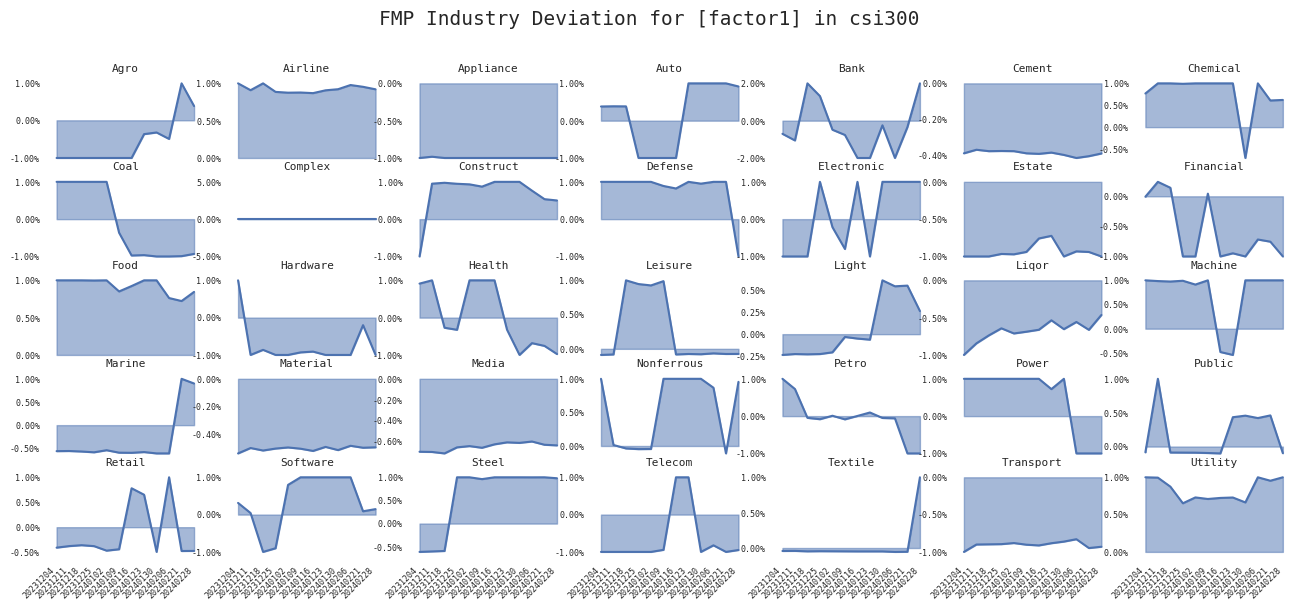

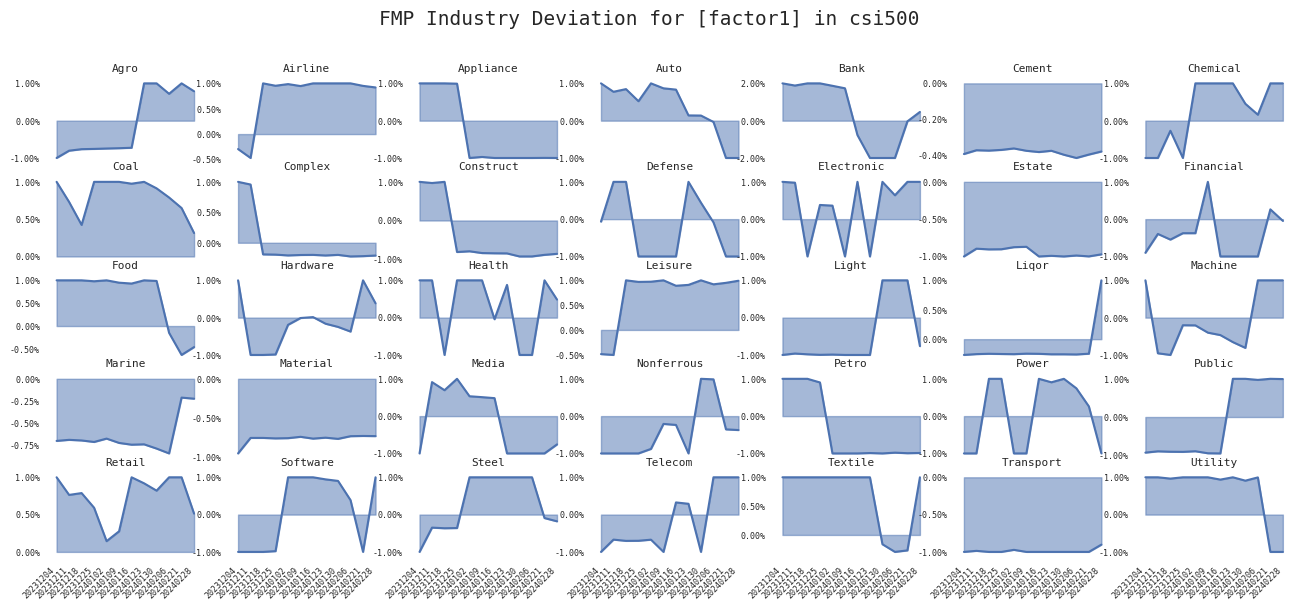

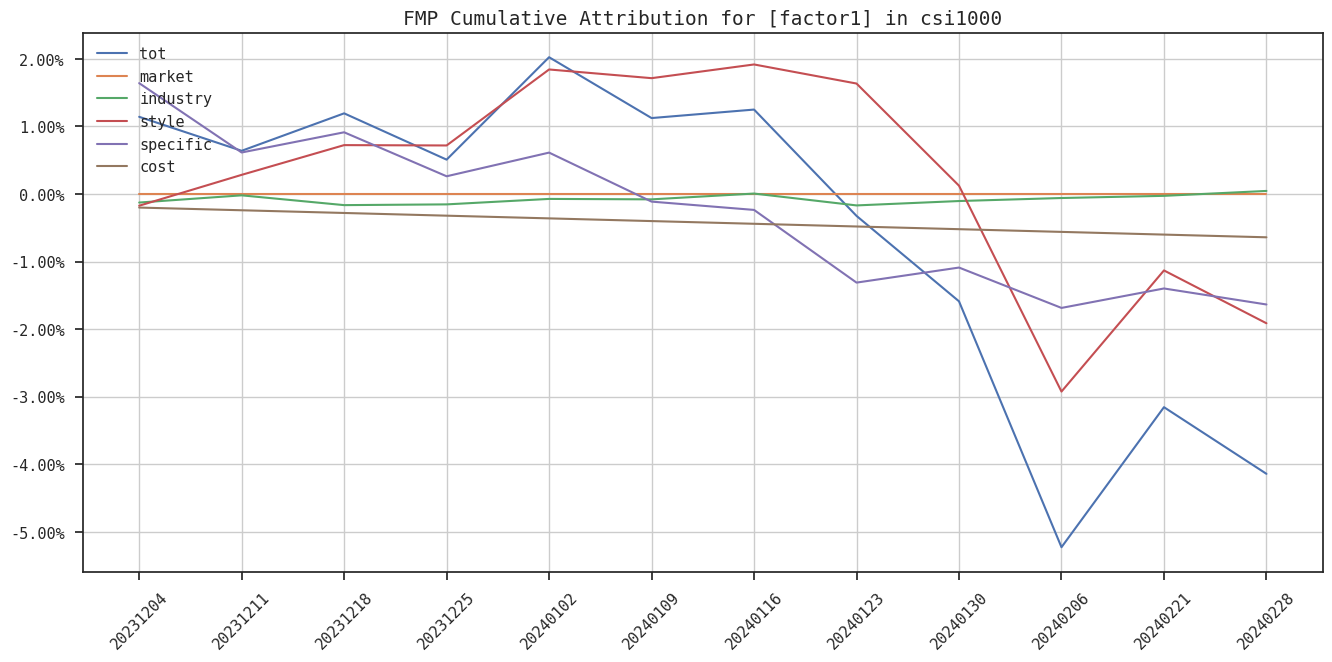

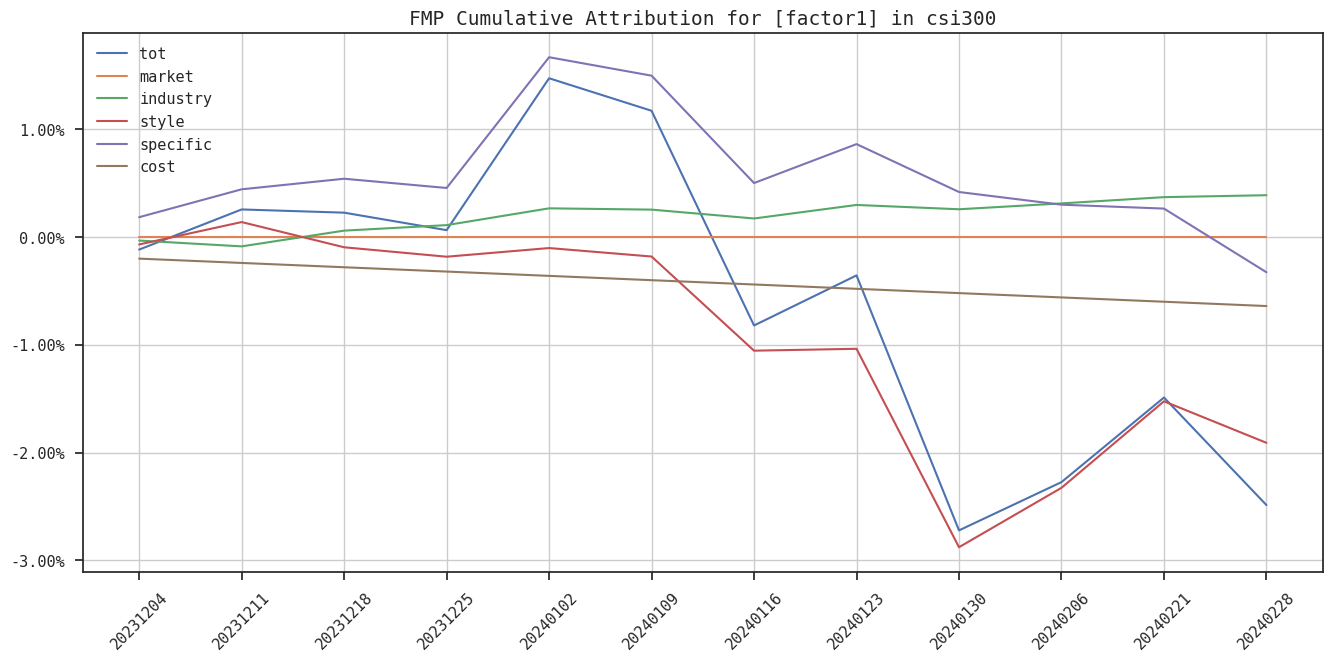

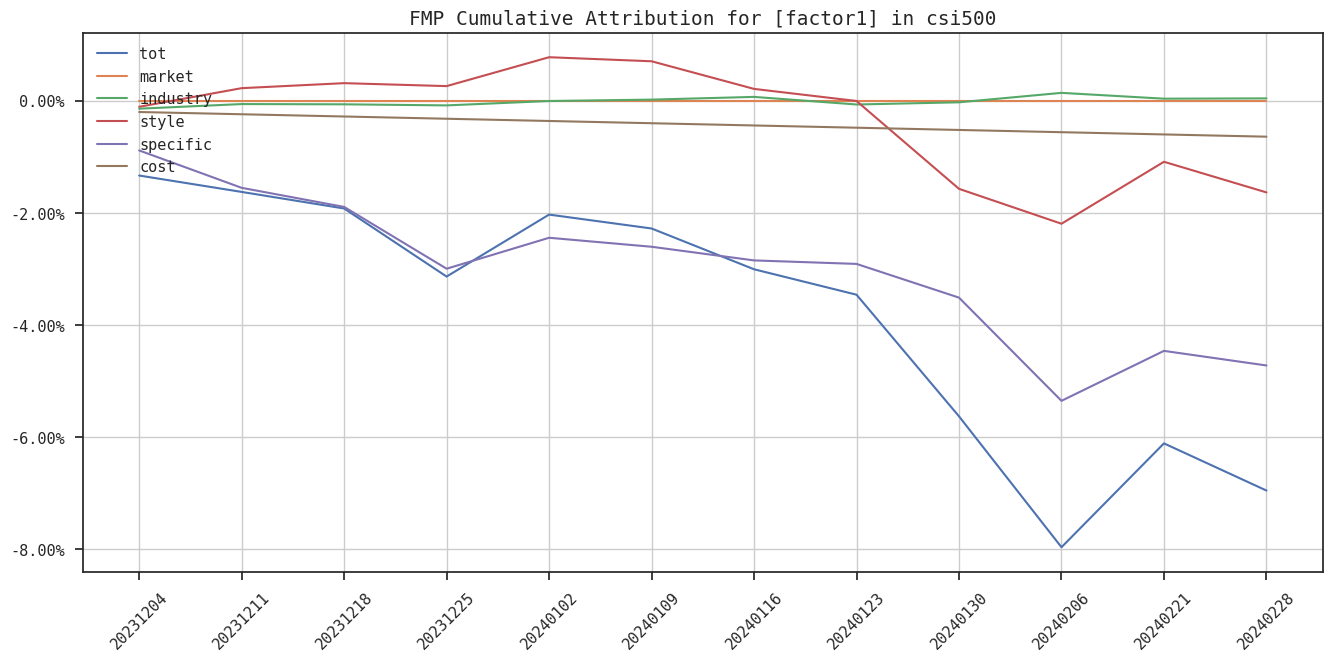

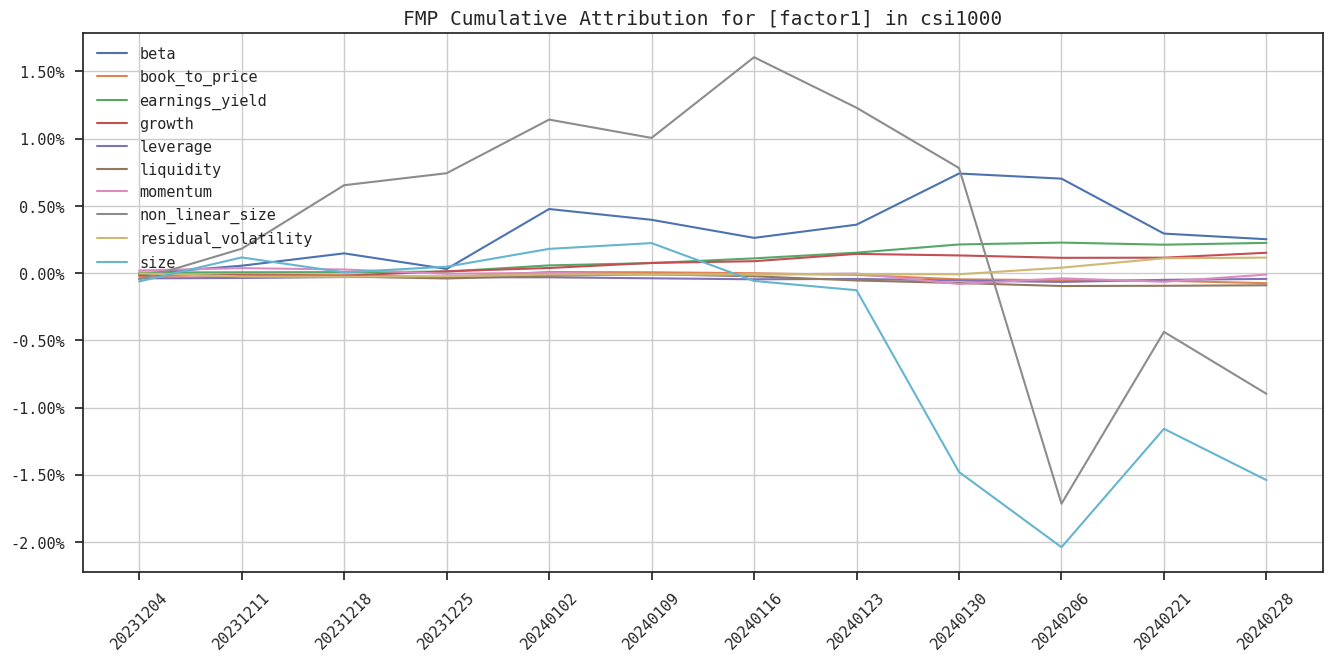

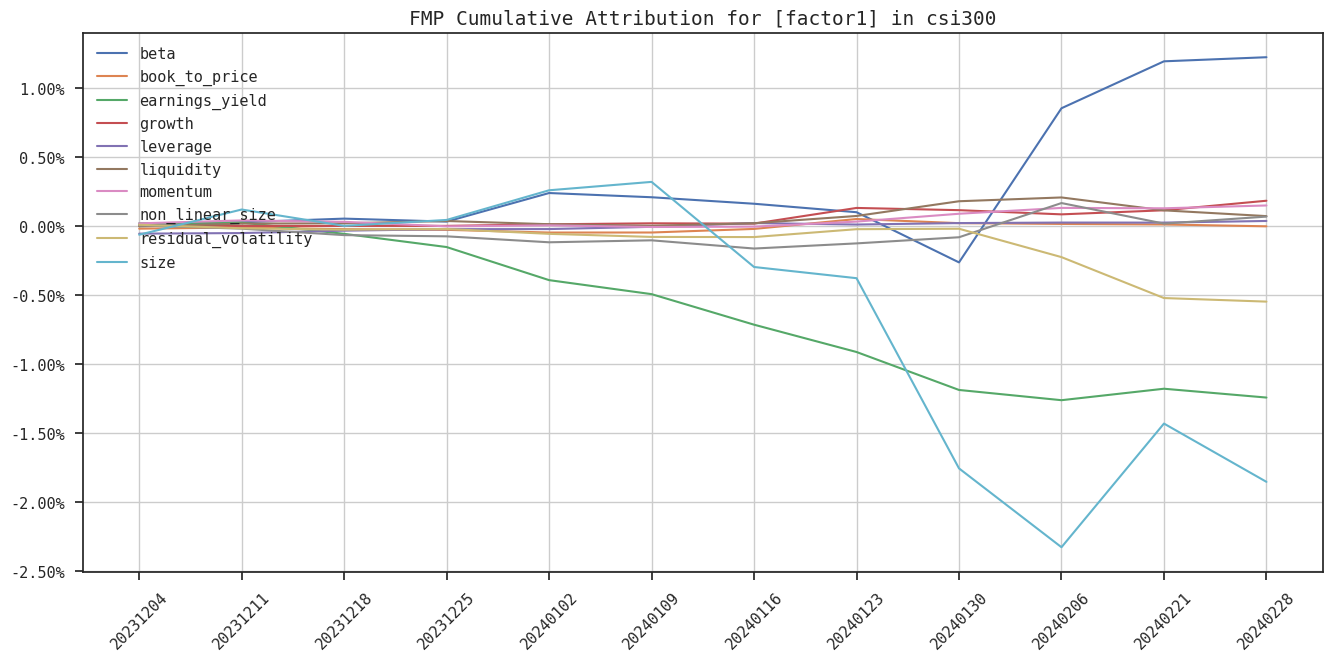

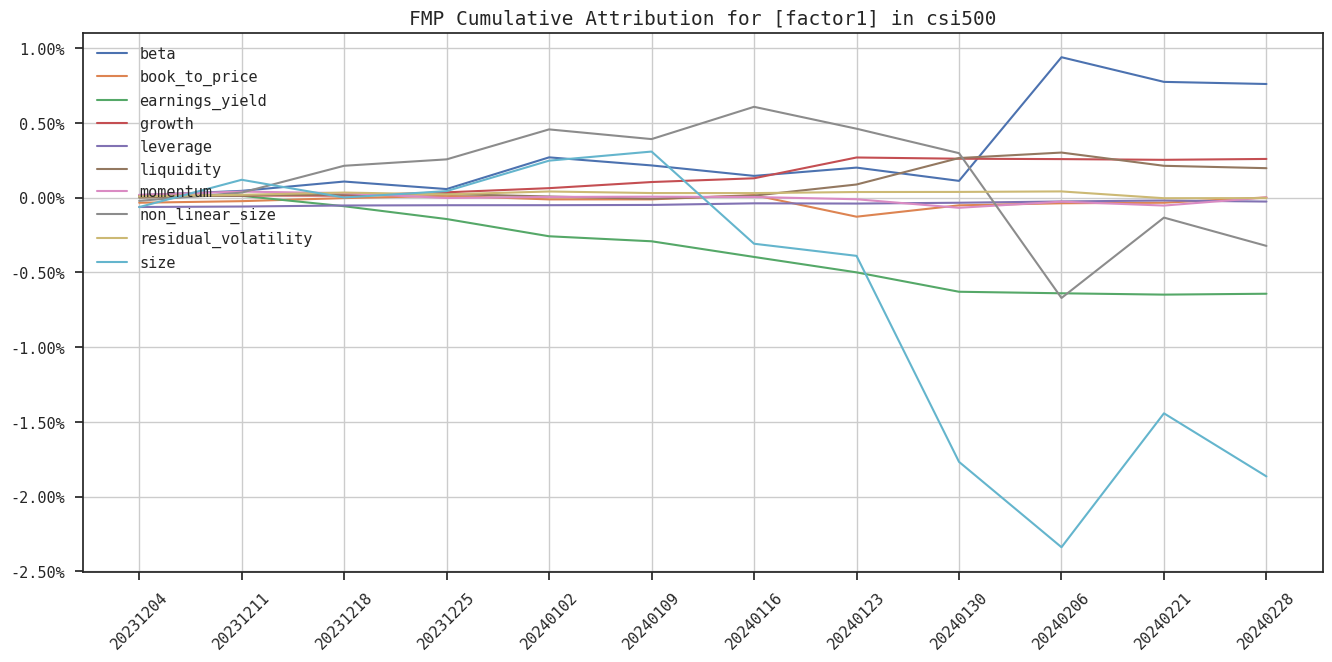

In [6]:
from IPython.display import display 
a = [display(fig) for fig in rslt.get_figs().values()]

In [1]:
from src.factor import api
rslt = api.perf_test()

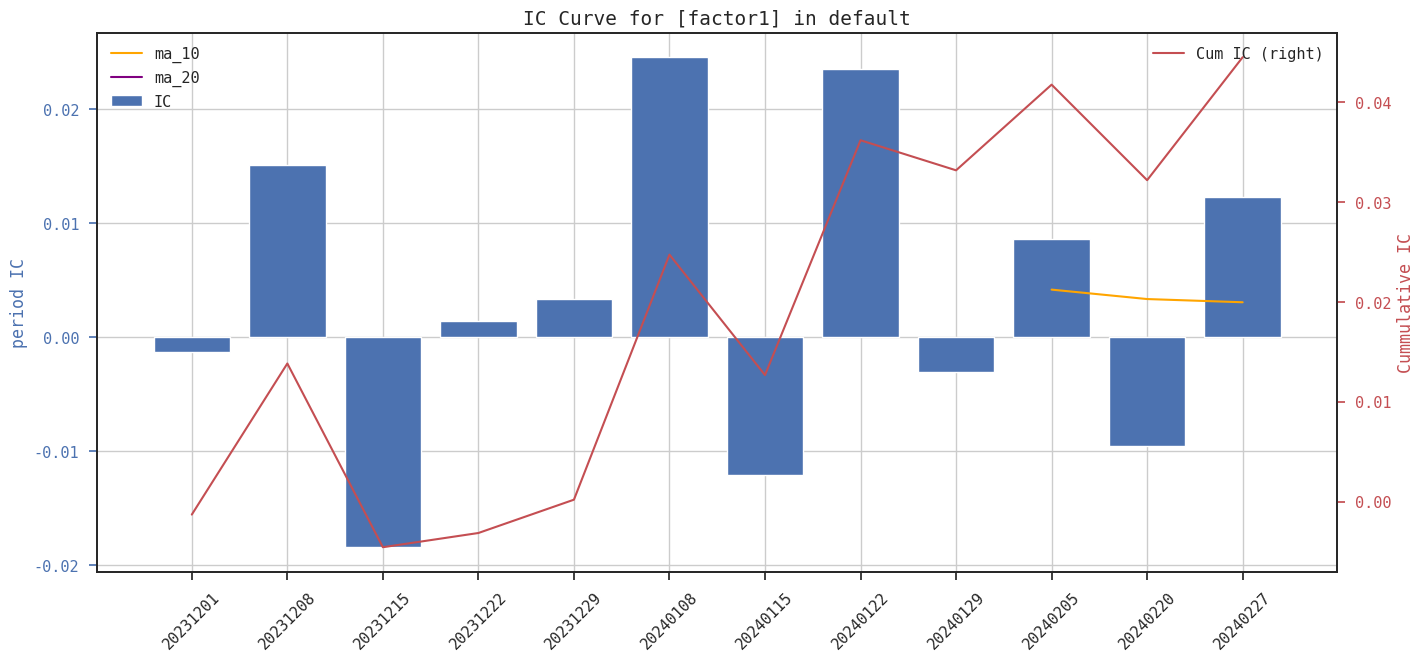

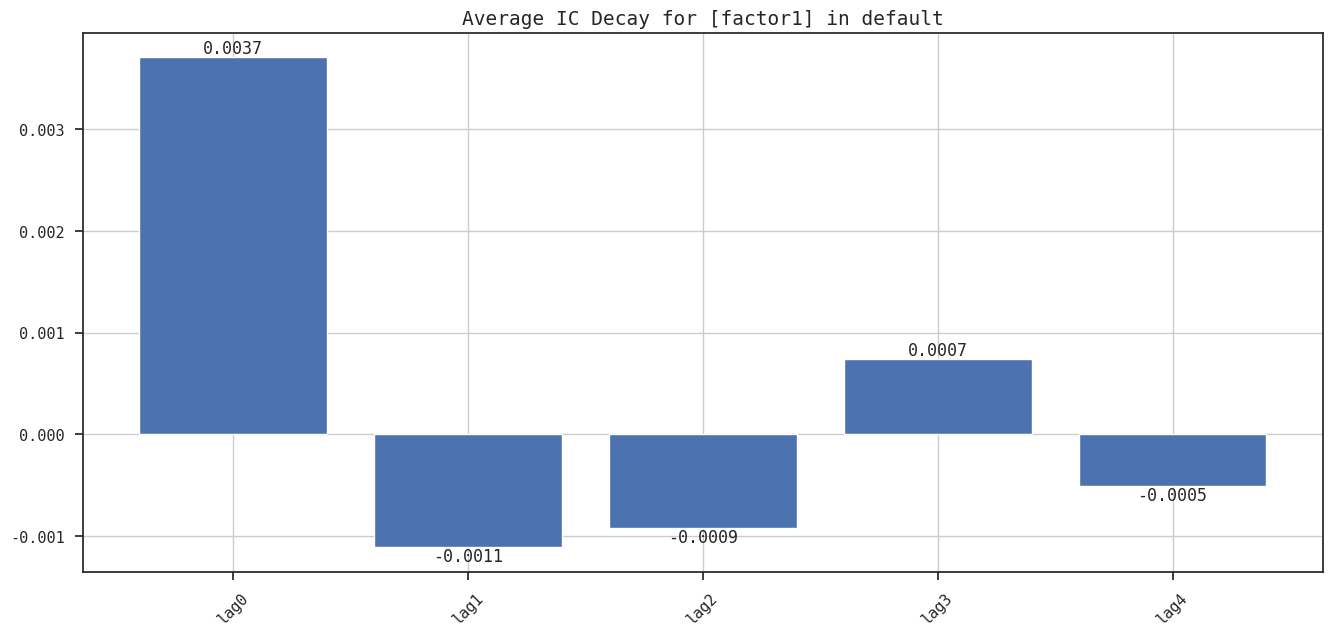

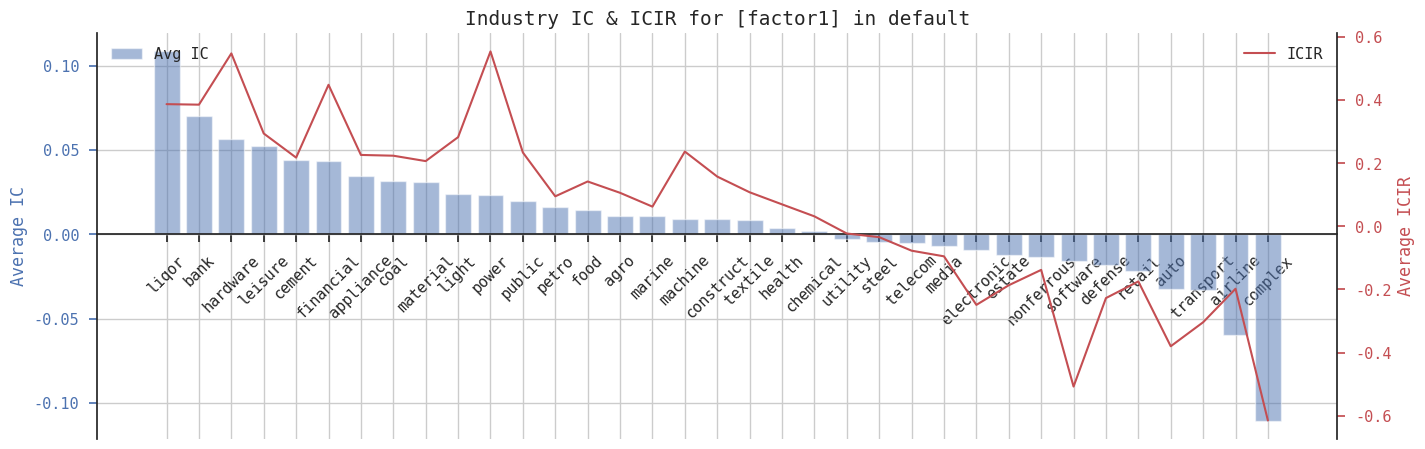

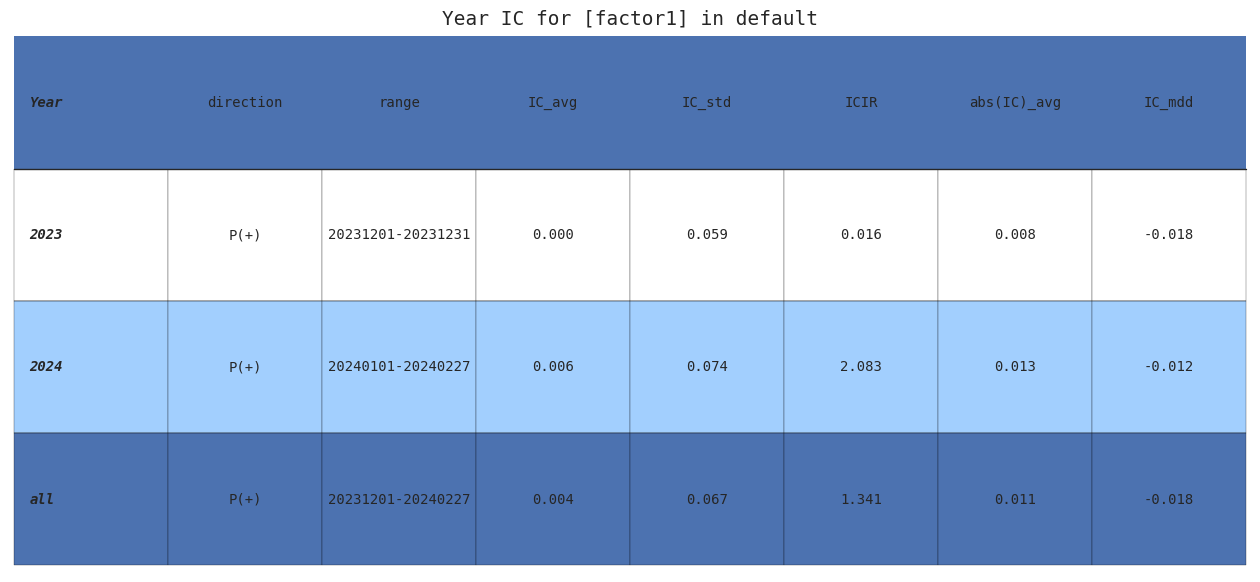

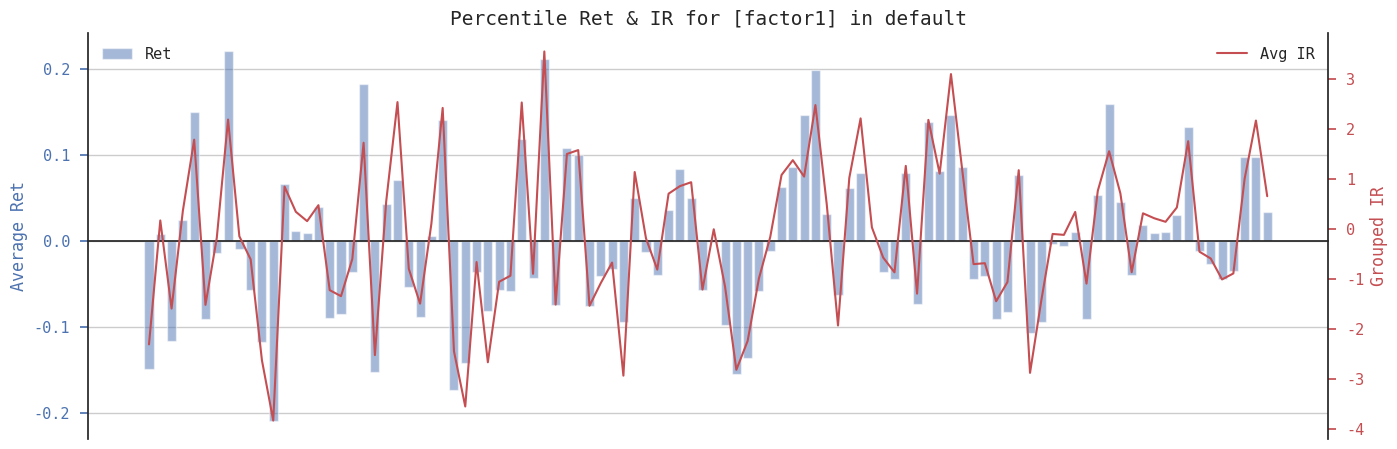

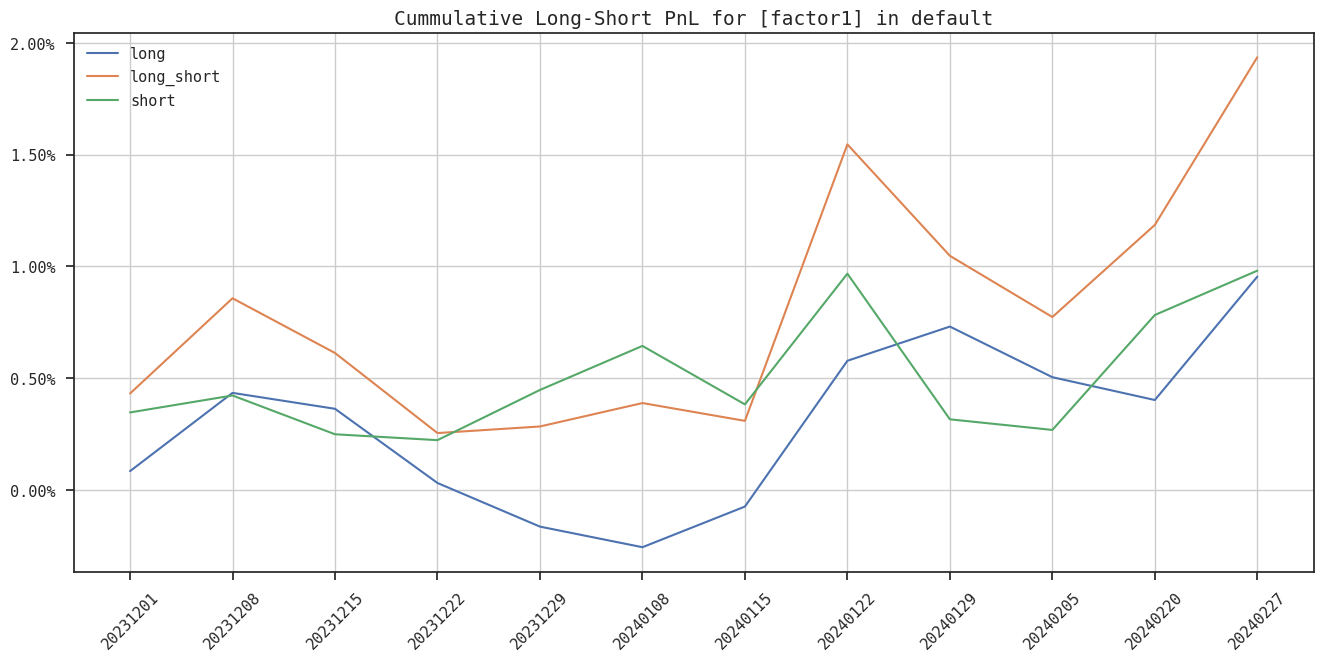

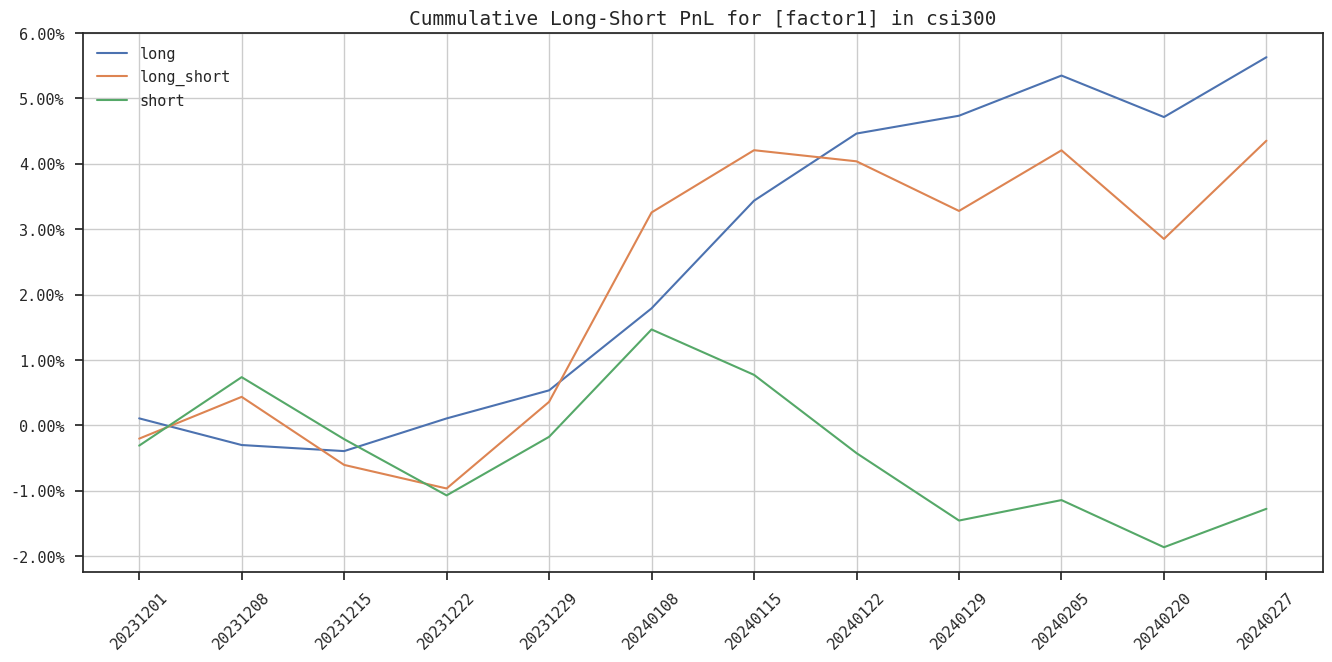

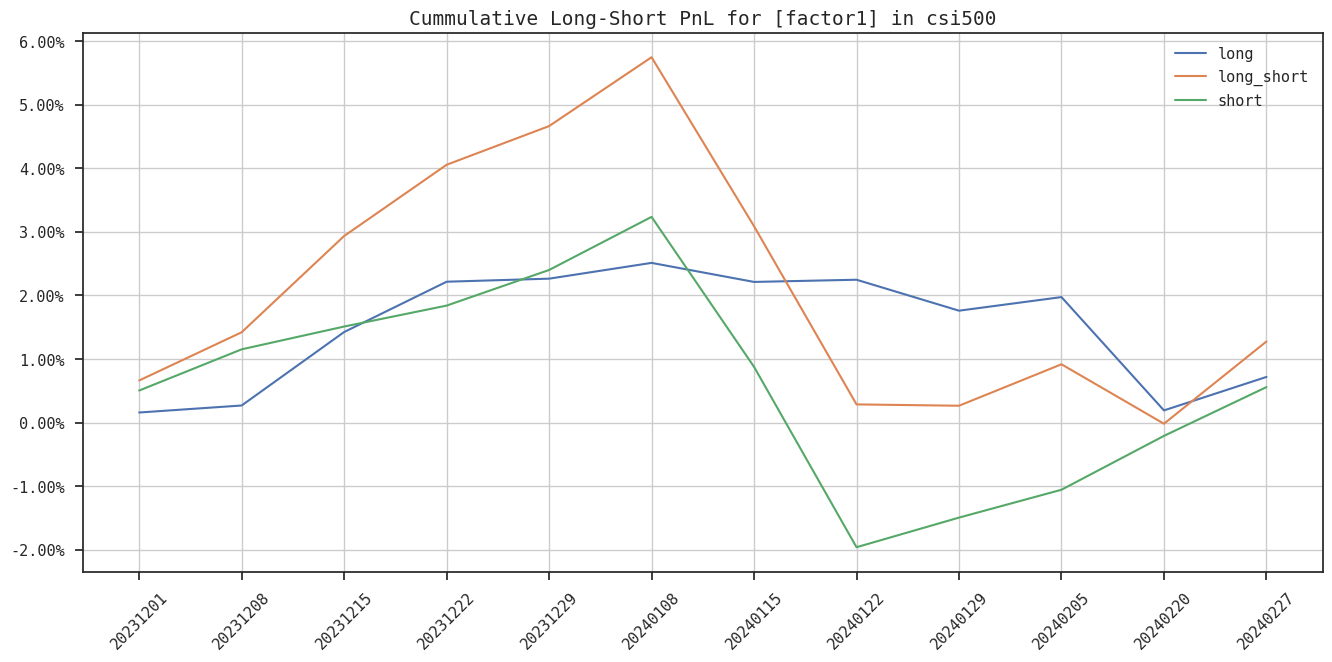

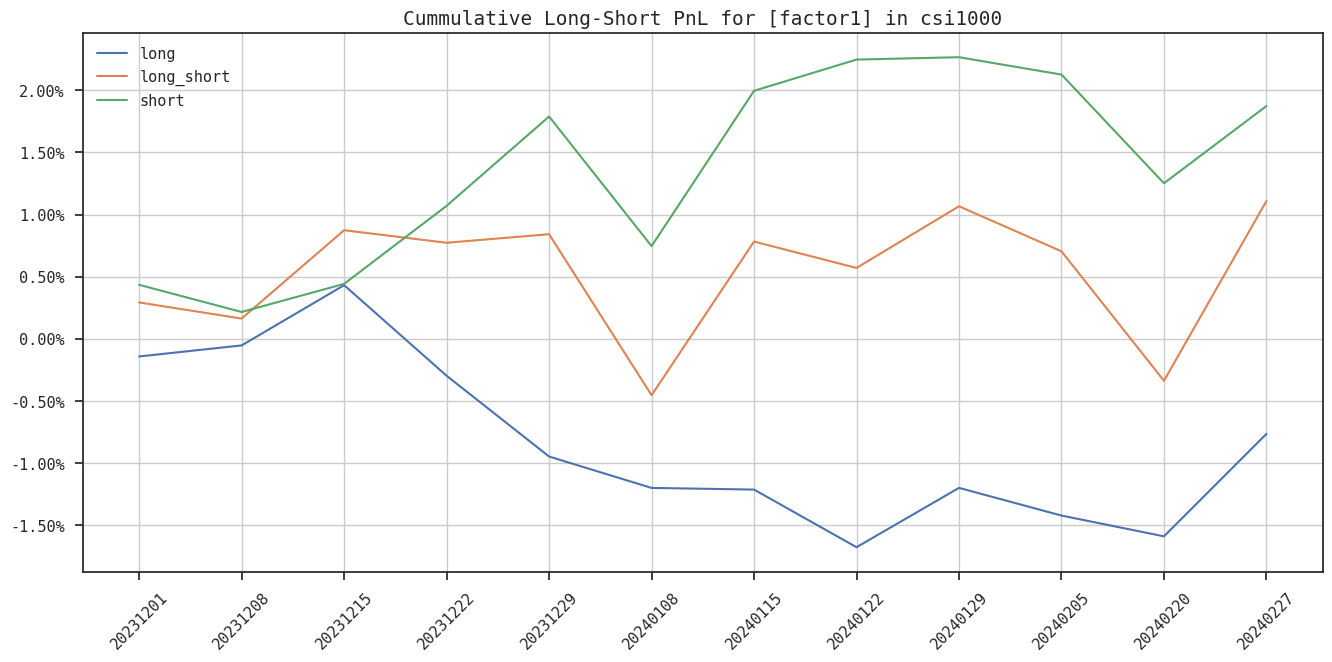

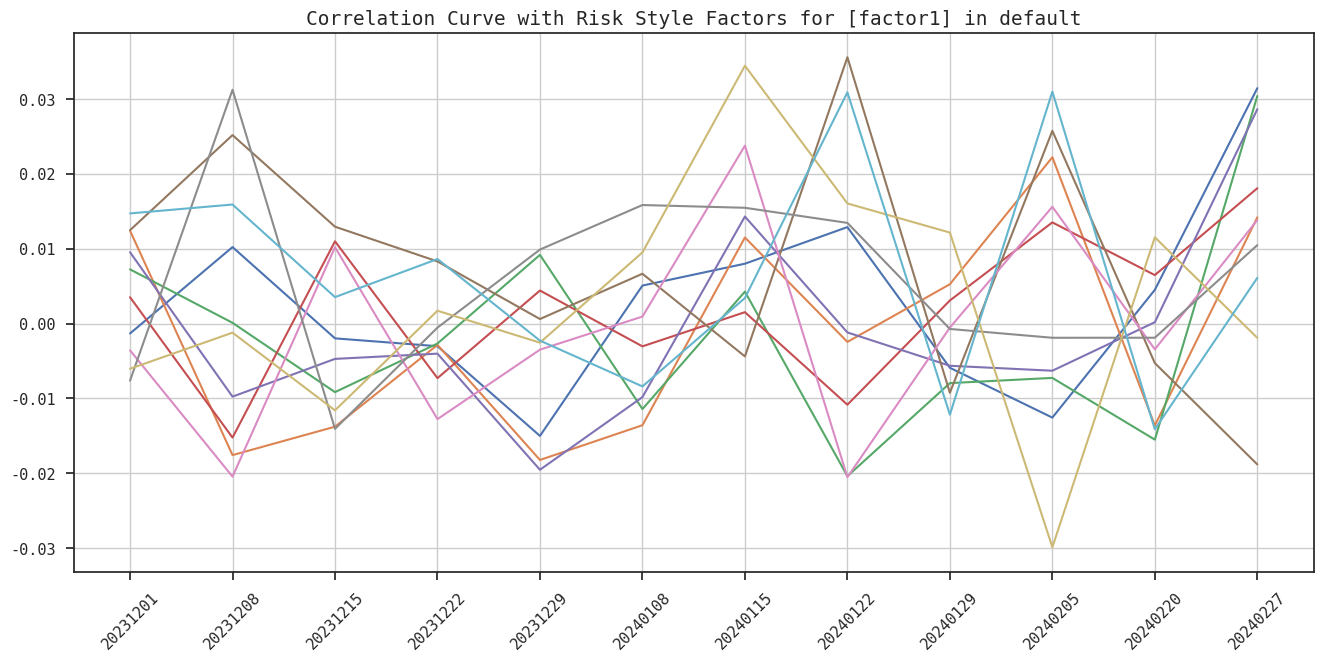

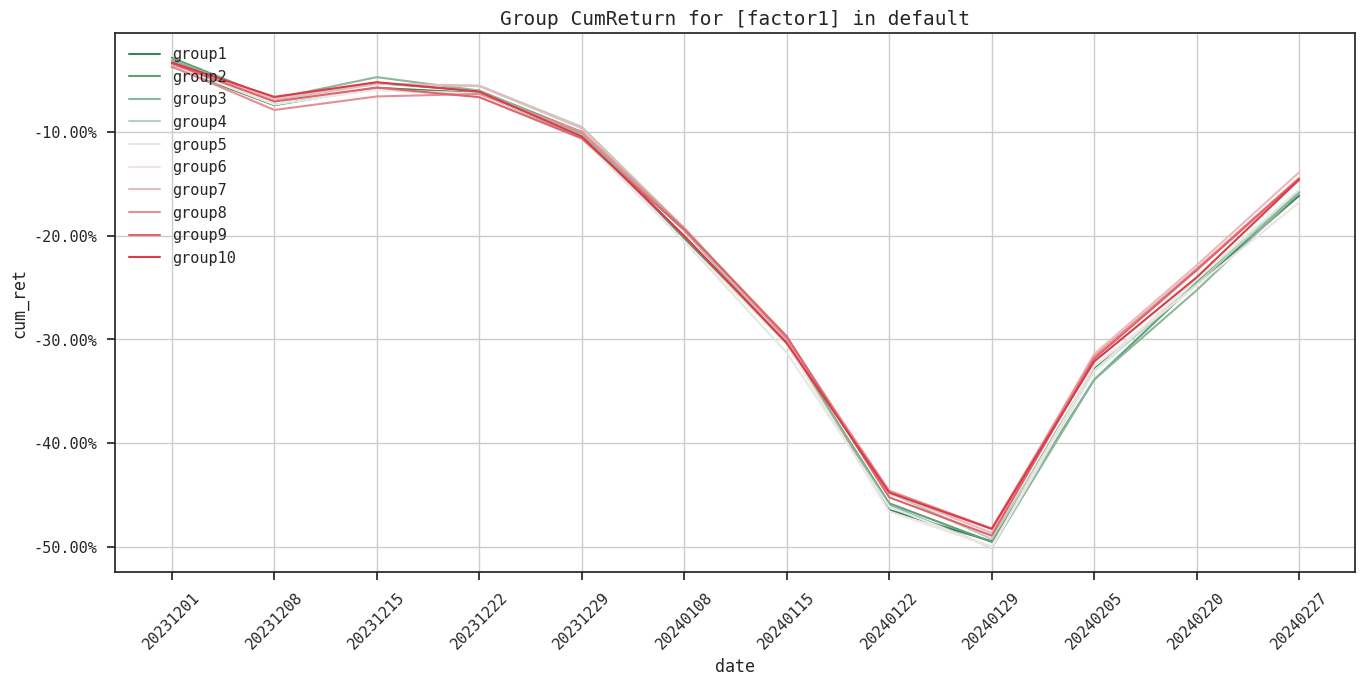

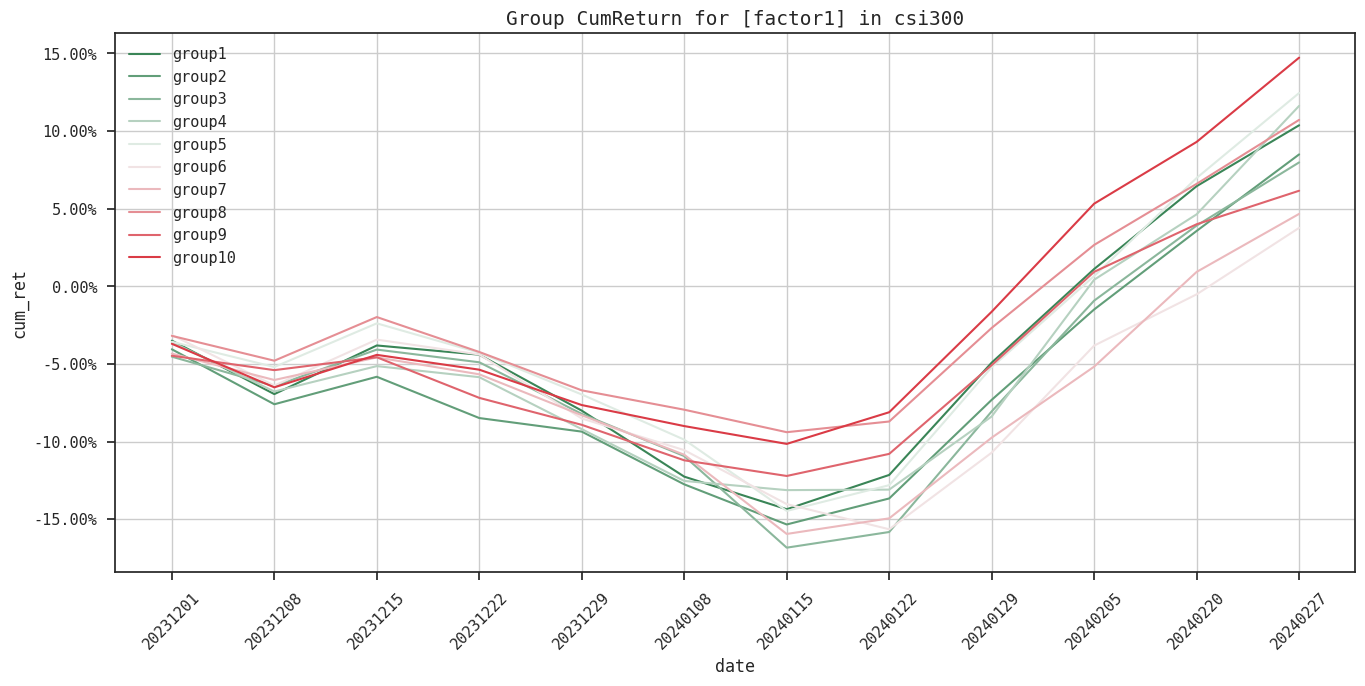

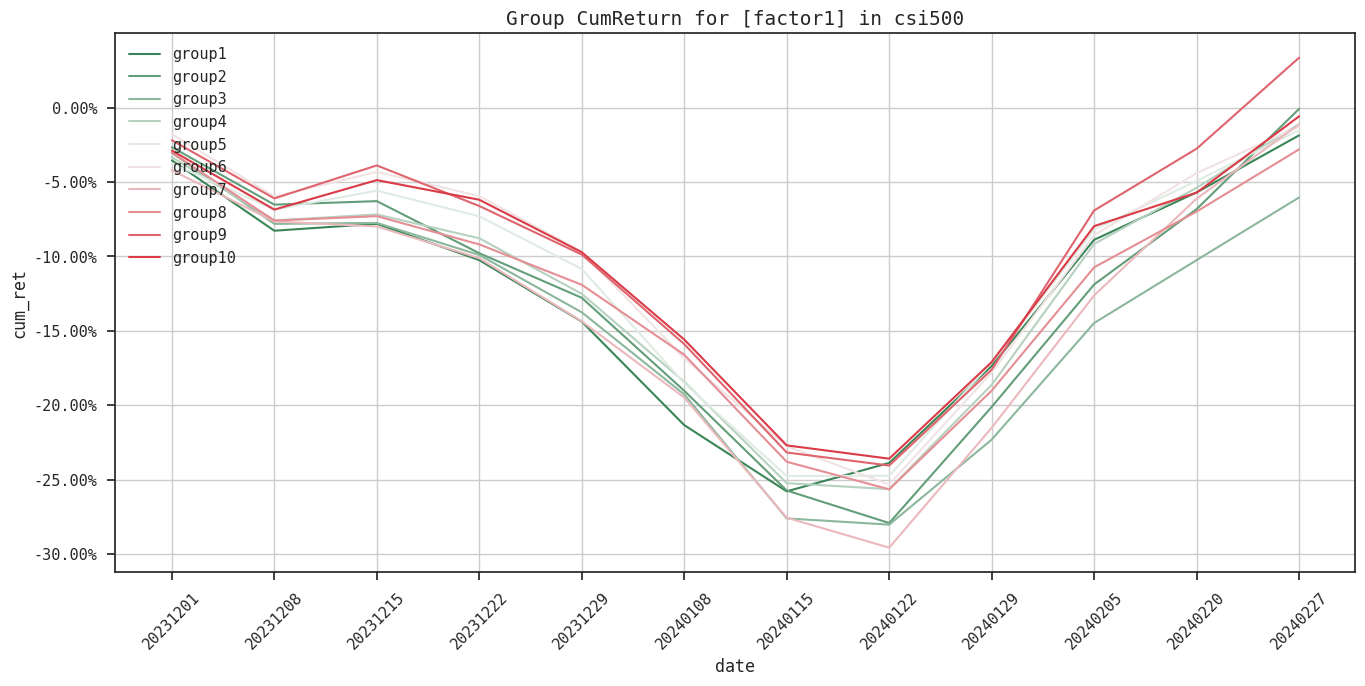

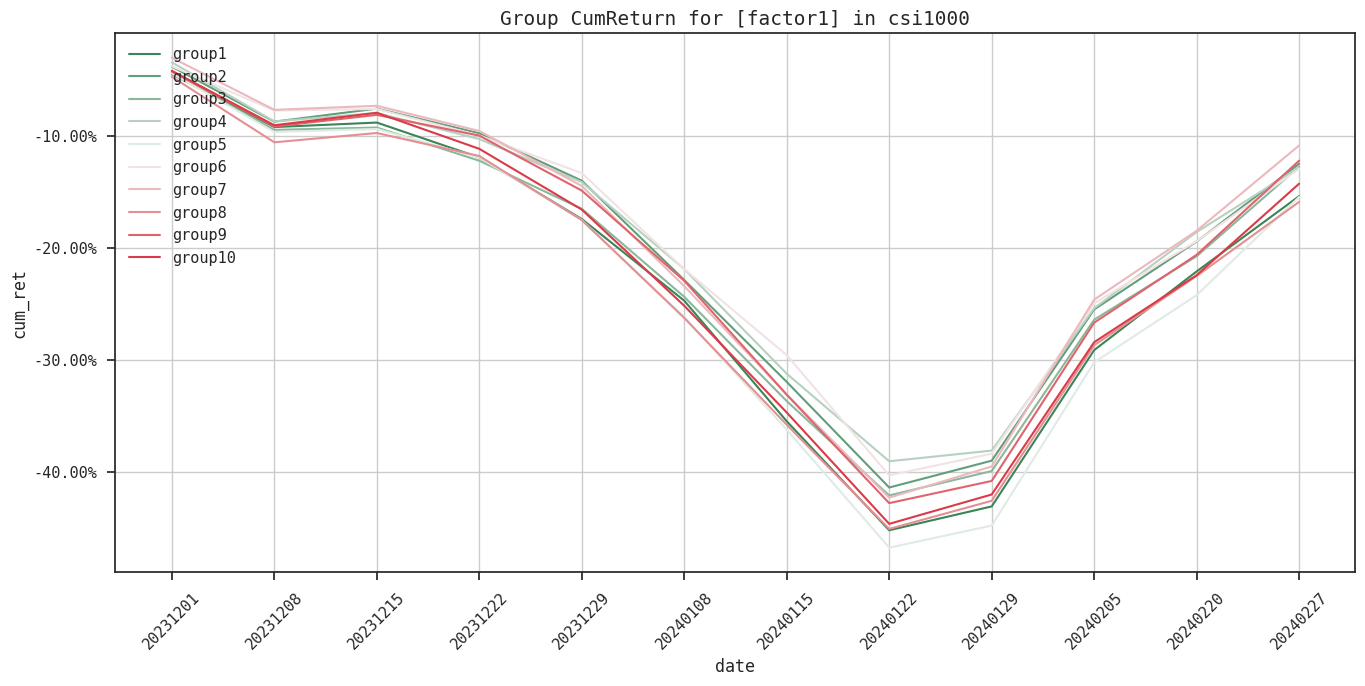

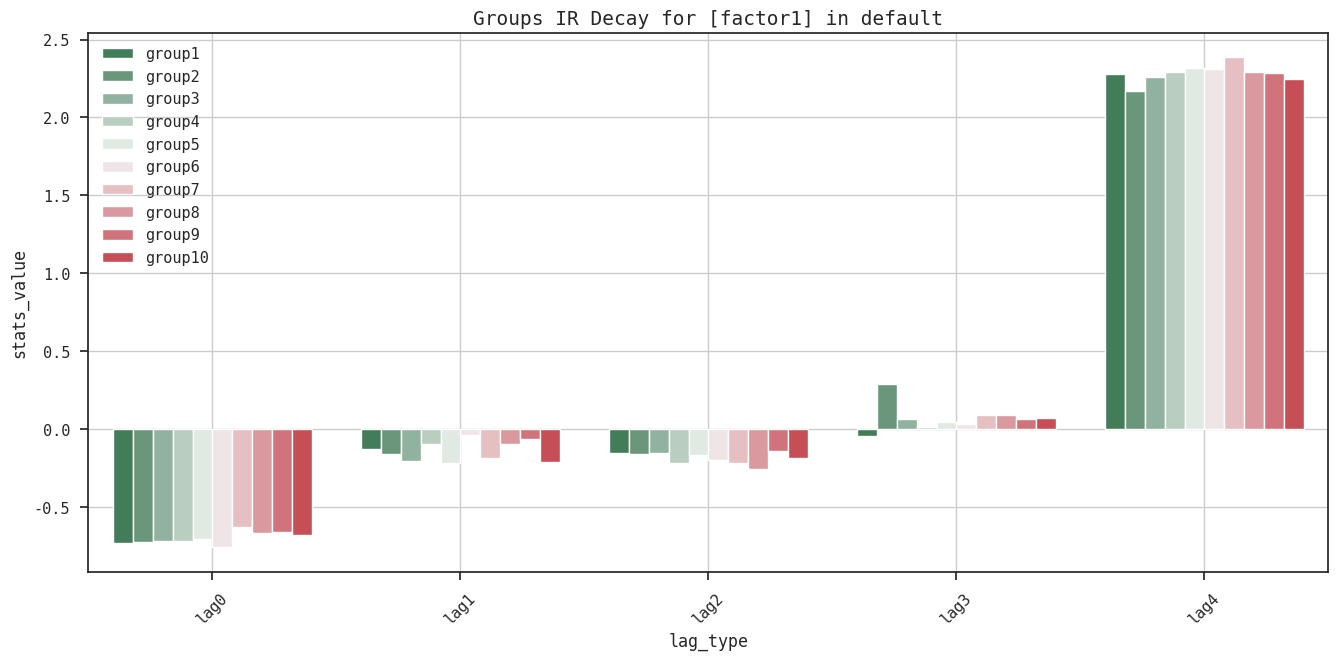

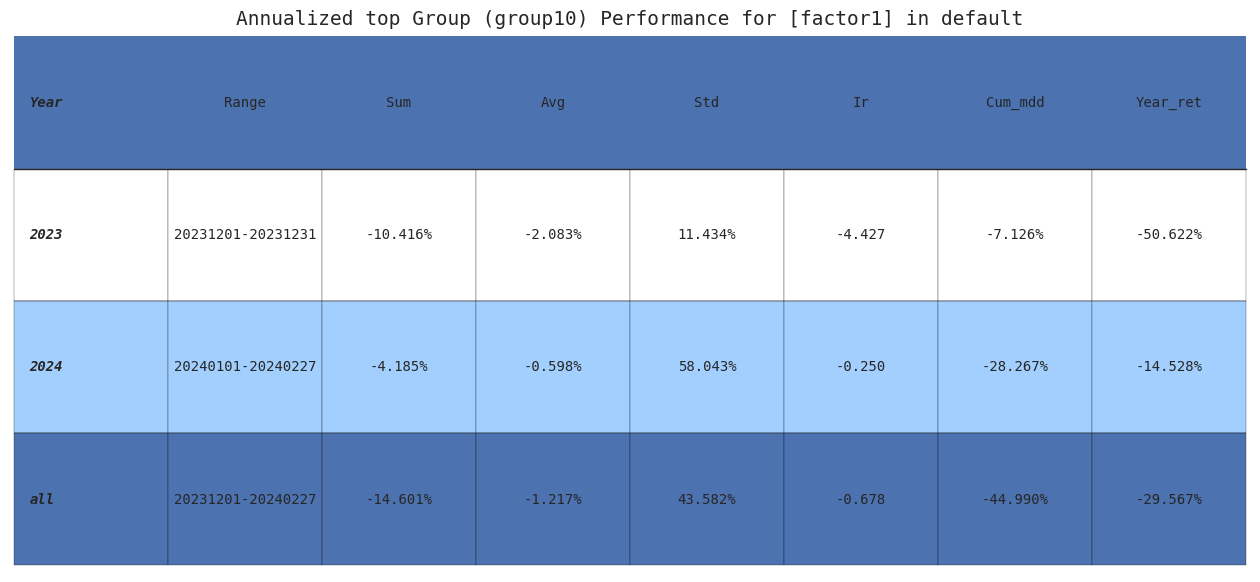

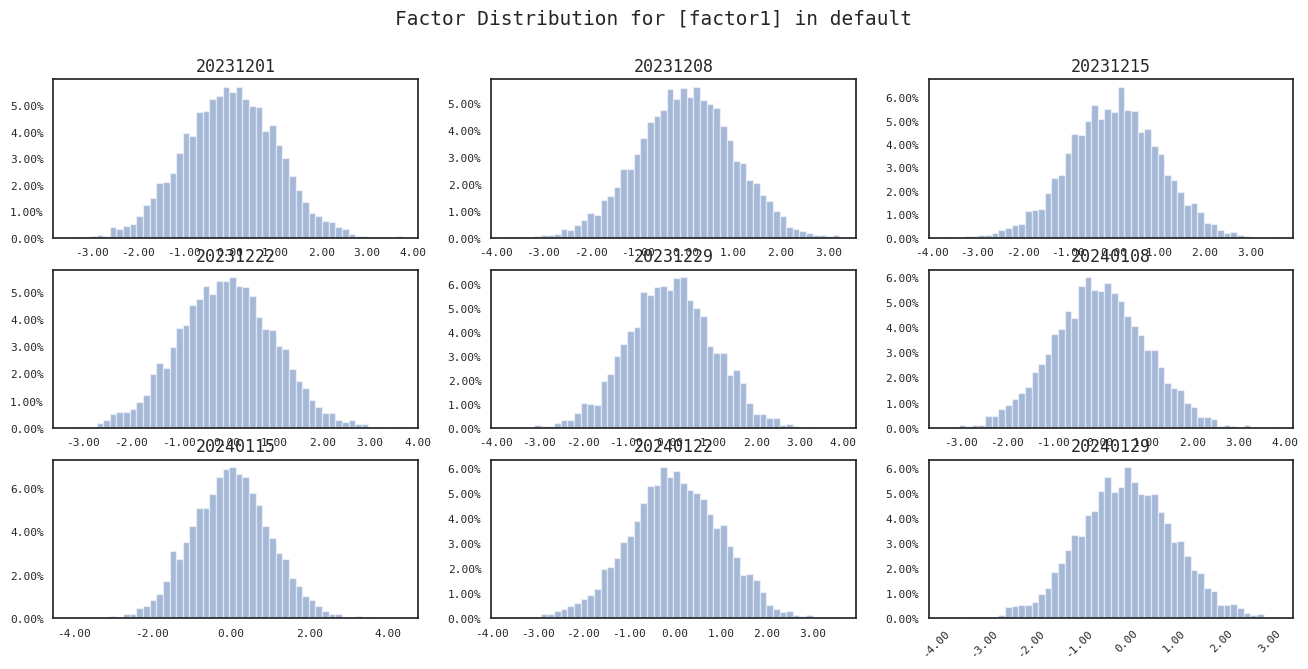

In [2]:
from IPython.display import display 
a = [display(fig) for fig in rslt.get_figs().values()]

In [6]:
a[0]

In [ ]:
from src.factor.optimizer.api import PortfolioOptimizer
config_path = 'custom_opt_config.yaml'

optim = PortfolioOptimizer('quadprog')
optim.setup_optimizer(config_path)

s0 = optim.optimize(20240530)
s0


In [ ]:
from src.factor.basic import RISK_MODEL
risk_model = RISK_MODEL.get(20240606)

In [1]:
from src.factor.perf.api import PerfManager , BENCHMARKS
from src.factor import loader

factor_val = loader.factor.random(20230701 , 20240331 , nfactor=2)
benchmark  = BENCHMARKS['csi500']

PerfManager(perf_params={}, all=False, ic_curve=False, ic_decay=False, ic_indus=False, ic_year=False, pnl_curve=False, style_corr=False, group_curve=False, group_decay_ret=False, group_decay_ir=False, group_year=True, distr_curve=False, distr_qtile=False)

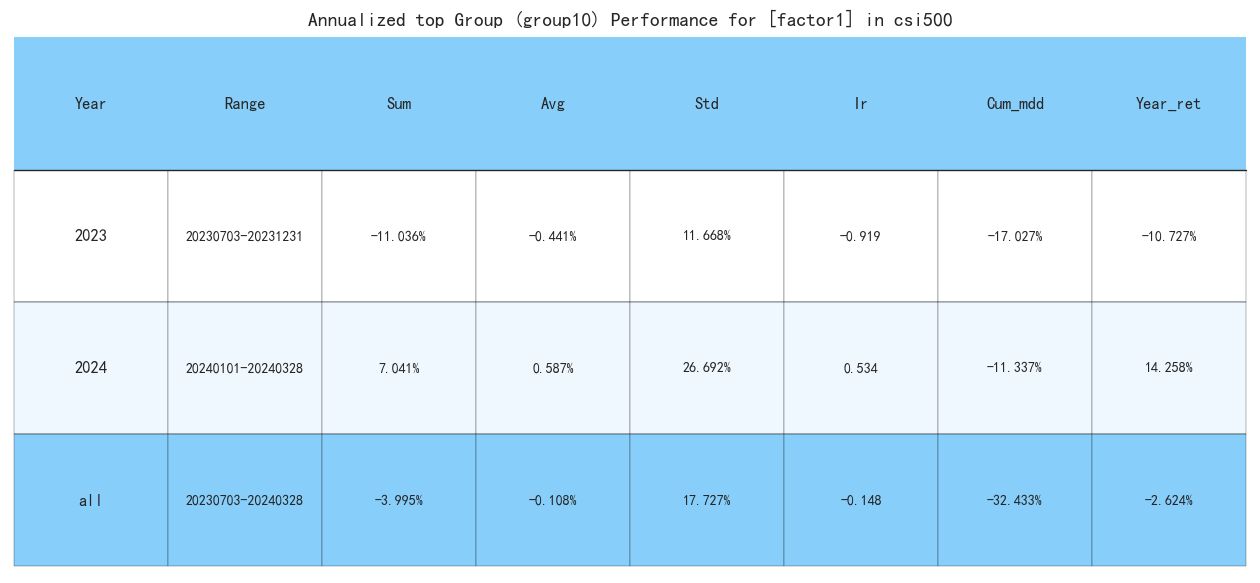

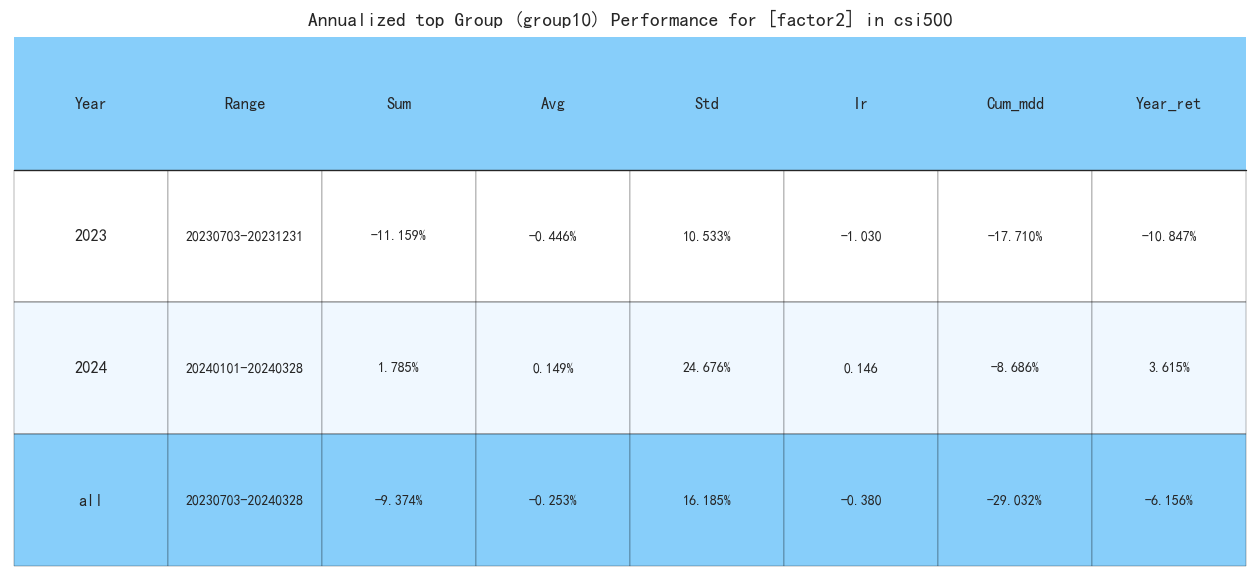

In [2]:
man = PerfManager(group_year=True)
man.calc(factor_val , benchmark).plot(True)

In [1]:
from src.factor.fmp.api import main_test
from src.factor.fmp.stat import calc_fmp_account
acc = main_test(2 , verbosity=2)

df = calc_fmp_account(acc)

Group optimization of 2 alphas , 2 benchmarks , 2 lags , 13 dates , (104 opts) start!
Done Optimize [factor1.csi300  ] at 20230703 , time cost (ms) : {'parse_input': 24.5, 'solve': 96.42, 'output': 15.62}
Done Optimize [factor1.csi500  ] at 20230703 , time cost (ms) : {'parse_input': 31.24, 'solve': 75.61, 'output': 15.62}
Done Optimize [factor1.csi300.1] at 20230703 , time cost (ms) : {'parse_input': 46.81, 'solve': 84.62, 'output': 22.58}
Done Optimize [factor1.csi500.1] at 20230703 , time cost (ms) : {'parse_input': 21.93, 'solve': 95.39, 'output': 18.09}
Done Optimize [factor2.csi300  ] at 20230703 , time cost (ms) : {'parse_input': 38.13, 'solve': 70.83, 'output': 17.67}
Done Optimize [factor2.csi500  ] at 20230703 , time cost (ms) : {'parse_input': 31.29, 'solve': 69.01, 'output': 15.66}
Done Optimize [factor2.csi300.1] at 20230703 , time cost (ms) : {'parse_input': 16.75, 'solve': 86.51, 'output': 21.11}
Done Optimize [factor2.csi500.1] at 20230703 , time cost (ms) : {'parse_inp

In [2]:
import torch
df = calc_fmp_account(acc)
torch.save(df , 'df.pt')

In [2]:
import torch

df = torch.load('df.pt')

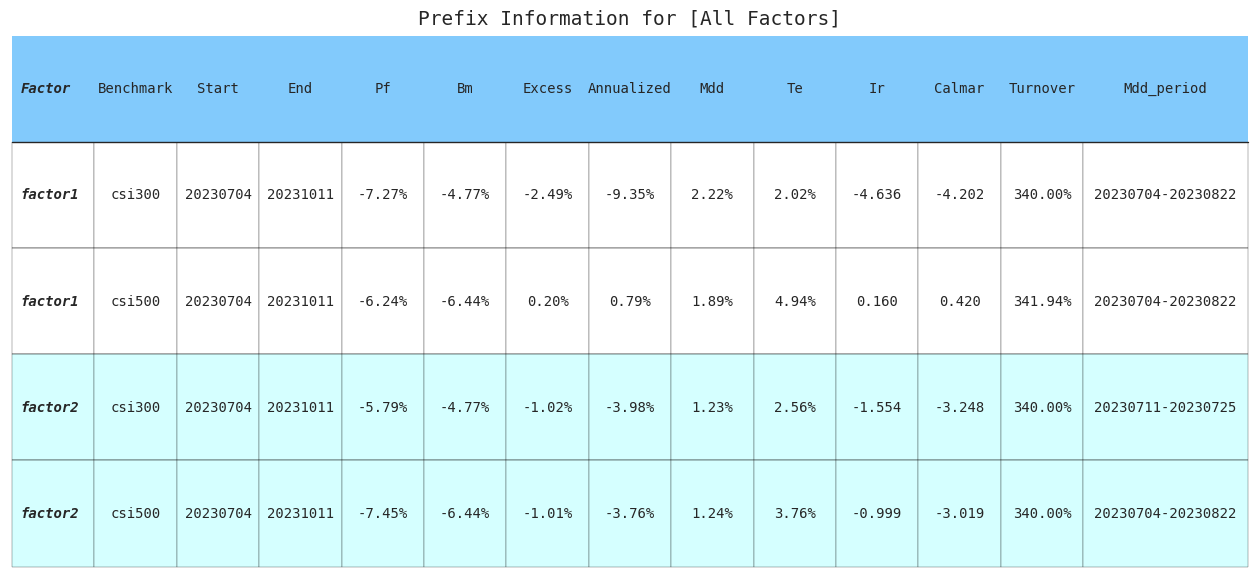

In [30]:
from src.factor.basic.plot import plot_head , plot_tail
from src.factor.fmp.stat import eval_fmp_stats
from plottable import ColumnDefinition , Table
import matplotlib.pyplot as plt


import pandas as pd
import torch

plt.rcParams['font.family'] = ['monospace']

def plot_table(df : pd.DataFrame , pct_cols = [] , flt_cols = [] , capitalize = True , 
               pct_ndigit = 2 , flt_ndigit = 3 , emph_last_row = True , 
               stripe_rows : int | list[int] = 1 , column_definitions = []):

    pct_cols = ['pf','bm','excess','annualized','mdd','te','turnover']
    flt_cols = ['ir','calmar']
    if pct_cols: df = df.assign(**df.loc[:,pct_cols].map(lambda x:f'{x:.{pct_ndigit}%}'))
    if flt_cols: df = df.assign(**df.loc[:,flt_cols].map(lambda x:f'{x:.{flt_ndigit}f}'))
    if capitalize:
        df.index.names = [col.capitalize() if isinstance(col , str) else col for col in df.index.names]
        df.columns = [col.capitalize() if isinstance(col , str) else col for col in df.columns]
    column_definitions += [ColumnDefinition(name = df.index.names[0] , 
                                            textprops = {'ha':'left','fontsize':10,'weight':'bold','style':'italic'})]
    tab = Table(df , textprops = {'ha':'center','fontsize':10} ,  
                cell_kw={'edgecolor':'black','linewidth': 0.2,} , 
                column_definitions = column_definitions)
    # tab.col_label_row.set_fontsize(12)
    tab.col_label_row.set_facecolor('#82cafc')
    #tab.columns[tab.column_names[0]].set_fontsize(12)
    rows = list(tab.rows.values())
    if stripe_rows: 
        if isinstance(stripe_rows , int):
            stripe_rows = [stripe_rows] * (int(len(rows) / stripe_rows) + 1)
        row_i , row_color = 0 , False
        while stripe_rows and row_i < len(rows):
            r = stripe_rows.pop(0)
            if row_color: [r.set_facecolor('#d5ffff') for r in rows[row_i:row_i + r]] # '#d0fefe'
            row_color = not row_color
            row_i += r
    if emph_last_row: rows[-1].set_facecolor('#82cafc')
    return tab


df = torch.load('df.pt')

def calc_fmp_prefix(account : pd.DataFrame):
    group_cols = ['factor_name' , 'benchmark']
    grouped = account[account['lag']==0].drop(columns=['lag']).groupby(group_cols)
    basic = pd.concat([grouped['trade_date'].min().rename('start') , grouped['period_end'].max().rename('end')] , axis=1)
    stats = grouped.apply(eval_fmp_stats , include_groups=False).reset_index(group_cols).reset_index(drop=True).set_index(group_cols)
    return basic.join(stats).reset_index()

def plot_fmp_prefix(df : pd.DataFrame):
    df , fig = plot_head(df , None , None)

    df = df.rename(columns={'factor_name':'factor'}).set_index('factor')
    plot_table(df , column_definitions = [ColumnDefinition(name='Mdd_period', width=2)] , 
               emph_last_row=False , stripe_rows=df.groupby('factor')['benchmark'].count().to_list())
    plot_tail('Prefix Information' , 'All Factors' , suptitle=False)
    return fig

a = calc_prefix(df)
plot_prefix(a)

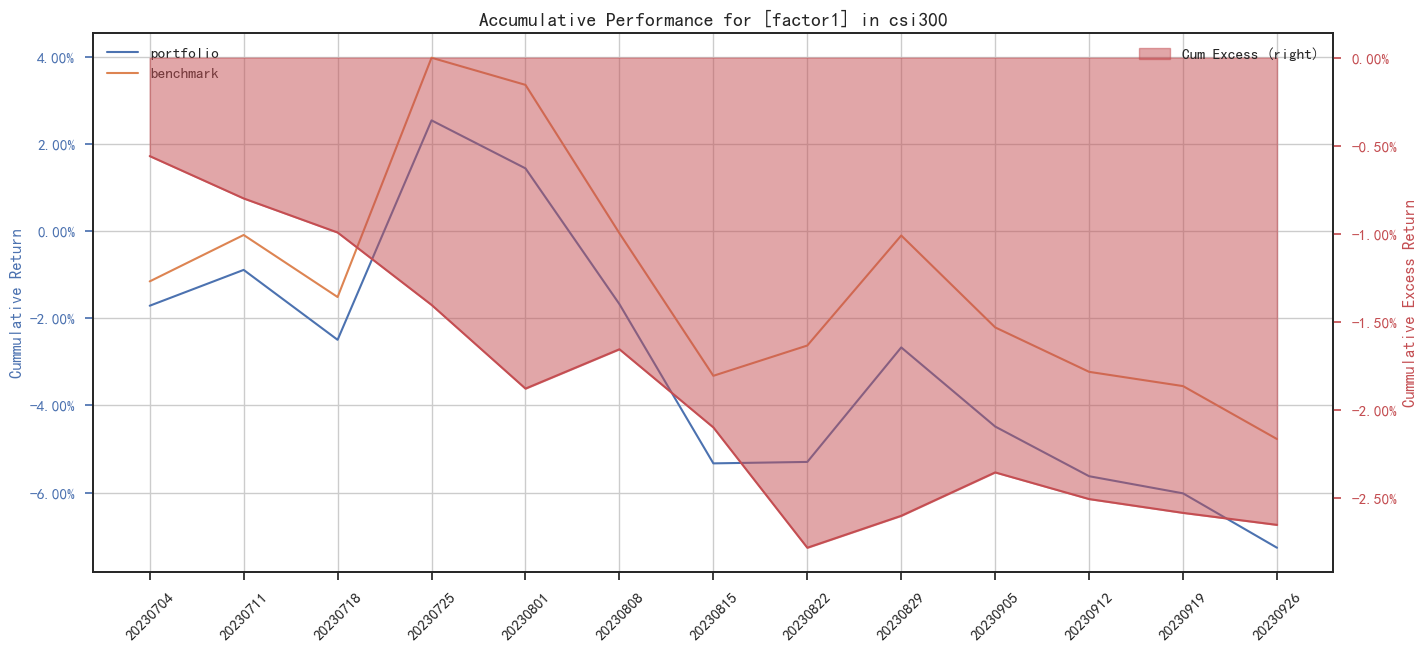

In [14]:
def calc_fmp_perf_curve(account : pd.DataFrame):
    df = account[account['lag']==0].loc[:,['factor_name','benchmark','trade_date','pf','bm','excess']].\
        set_index(['factor_name','benchmark','trade_date'])
    df[['bm','pf']] = np.log(df[['bm','pf']] + 1)
    df = df.groupby(['factor_name','benchmark'])[['bm','pf','excess']].cumsum()
    df[['bm','pf']] = np.exp(df[['bm','pf']]) - 1
    return df.reset_index()

@multi_factor_plot
def plot_fmp_perf_curve(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)

    df = df.set_index('trade_date').rename(columns={'pf':'portfolio','bm':'benchmark'})
    ax1 = fig.add_subplot(111)

    for col in ['portfolio','benchmark']: 
        ax1.plot(df.index, df[col], label=col)  
    
    ax1.set_ylabel('Cummulative Return', color='b')  
    ax1.tick_params('y', colors='b')  
    ax1.legend(loc='upper left')  
    ax1.yaxis.set_major_formatter(FuncFormatter(pct_fmt))  
    ax1.xaxis.set_tick_params(rotation=45)

    ax2 : Any = ax1.twinx()  
    ax2.plot(df.index, df['excess'], 'r-', )
    ax2.fill_between(df.index, df['excess'] , color='r', alpha=0.5 , label='Cum Excess (right)')
    
    ax2.set_ylabel('Cummulative Excess Return', color='r')  
    ax2.tick_params('y', colors='r')  
    ax2.legend(loc='upper right')  
    ax2.yaxis.set_major_formatter(FuncFormatter(pct_fmt))  

    ax1.grid()

    plot_tail(f'Accumulative Performance' , factor_name , benchmark , show , suptitle = False)
    return fig

rslt = calc_fmp_perf_curve(df)
a = plot_fmp_perf_curve(rslt)
a['factor1']['csi300']

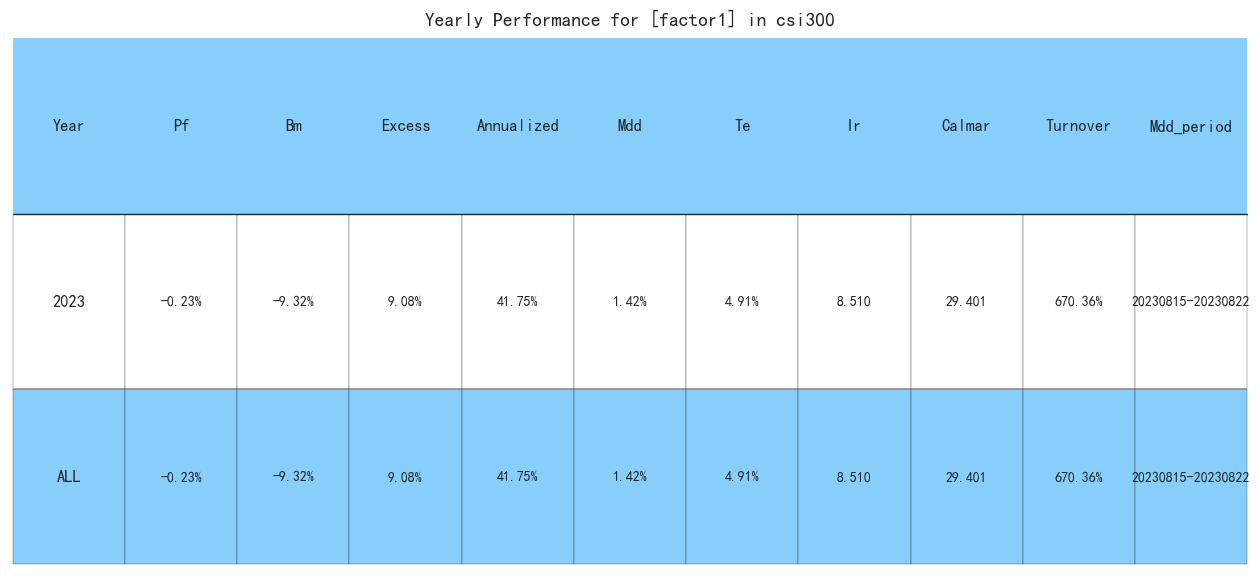

In [143]:
def calc_fmp_perf_period(account : pd.DataFrame , period : Literal['year' , 'yearmonth' , 'month'] = 'year'):
    if period=='year': account[period] = account['trade_date'].astype(str).str[:4]
    elif period == 'yearmonth':  account[period] = account['trade_date'].astype(str).str[:6]
    else: account[period] = account['trade_date'].astype(str).str[4:6]
    group_cols = ['factor_name' , 'benchmark']
    account = account[account['lag'] == 0].sort_values('trade_date')
    prd_stat = account.groupby(group_cols + [period]).\
        apply(eval_fmp_stats , mdd_period= (period != 'month') , include_groups = False).\
        reset_index(group_cols + [period]).reset_index(drop=True)
    all_stat = account.groupby(group_cols).\
        apply(eval_fmp_stats , mdd_period= (period != 'month') , include_groups = False).\
        reset_index(group_cols).reset_index(drop=True).assign(**{period:'ALL'})
    return pd.concat([prd_stat , all_stat])

def calc_fmp_perf_yearly(account : pd.DataFrame):
    return calc_fmp_perf_period(account , 'year')

def plot_table(df , **kwargs):
    tab = Table(df , textprops = {'ha':'center','fontsize':10,'weight':'bold'} , 
                odd_row_color='aliceblue' , 
                cell_kw={'edgecolor':'black','linewidth': 0.2,} , **kwargs)
    tab.col_label_row.set_fontsize(12)
    tab.col_label_row.set_facecolor('lightskyblue')
    tab.columns[tab.column_names[0]].set_fontsize(12)
    list(tab.rows.values())[-1].set_facecolor('lightskyblue')
    return tab

@multi_factor_plot
def plot_fmp_perf_yearly(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)
    pct_cols = ['pf','bm','excess','annualized','mdd','te','turnover']
    flt_cols = ['ir','calmar']
    df = df.assign(**df.loc[:,pct_cols].map(lambda x:f'{x:.2%}') , **df.loc[:,flt_cols].map(lambda x:f'{x:.3f}'))
    df.columns = [col.capitalize() for col in df.columns]
    tab = plot_table(df.set_index('Year') , column_definitions = [ColumnDefinition(name='mdd_period', width=2)])
    plot_tail(f'Yearly Performance' , factor_name , benchmark , show , suptitle = False)
    return fig

rslt = calc_fmp_perf_yearly(df)
a = plot_fmp_perf_yearly(rslt)
a['factor1']['csi300']

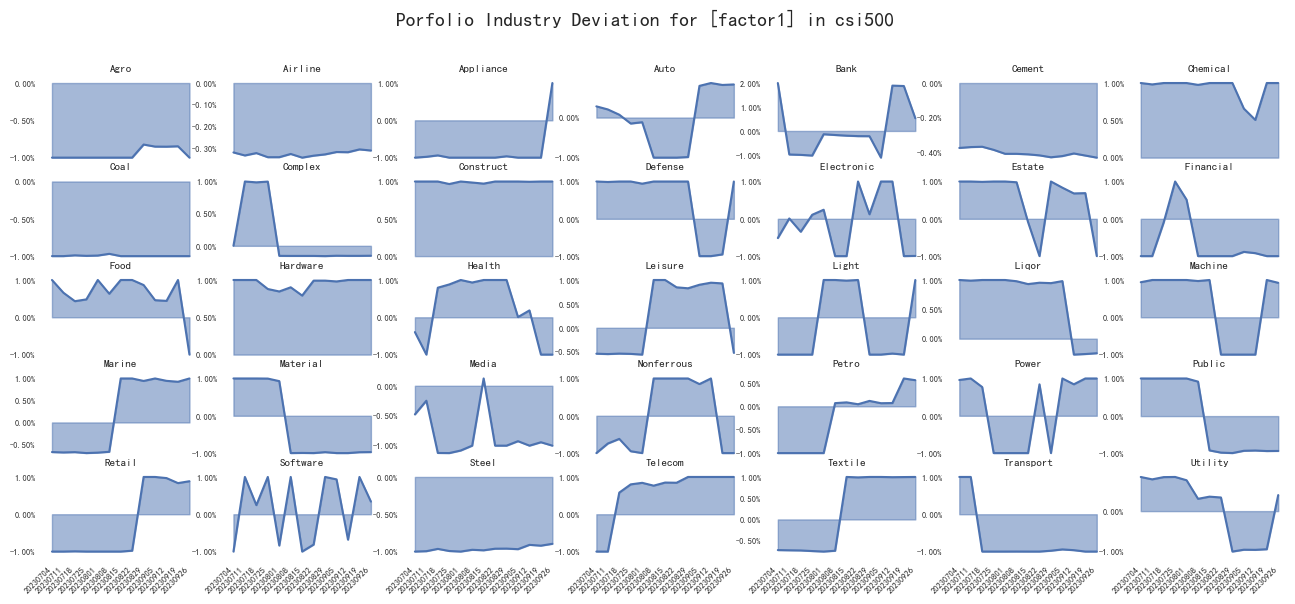

In [105]:
def calc_fmp_industry_exp(account : pd.DataFrame):
    index_cols = ['factor_name','benchmark','trade_date']
    df = account[account['lag']==0].loc[:,index_cols + ['analytic']].\
        set_index(index_cols).groupby(index_cols)['analytic'].\
        apply(lambda x:x.iloc[0].industry.loc[:,['active']])
    df = df.pivot_table('active' , index_cols , columns='industry').rename_axis(None , axis='columns')
    return df.reset_index()

@multi_factor_plot
def plot_fmp_industry_exp(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)
    df = df.set_index('trade_date')
    lay_out = (5, 7)
    assert len(df.columns) <= lay_out[0] * lay_out[1]
    for i , col in enumerate(df.columns): 
        ax = fig.add_subplot(*lay_out , i + 1 , frameon = False)
        ax.plot(df.index , df[col], label=col)
        ax.fill_between(df.index, df[col] , color='b', alpha=0.5)
        ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt))
        ax.yaxis.set_tick_params(labelsize = 6 , length = 0)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_tick_params(labelsize = 6 , length = 0)
        ax.set_title(col.capitalize() , fontsize = 8)
    fig.autofmt_xdate(rotation = 45)
    plot_tail(f'Porfolio Industry Deviation' , factor_name , benchmark , show , suptitle = True)
    return fig

rslt = calc_fmp_industry_exp(df)
a = plot_fmp_industry_exp(rslt)
a['factor1']['csi500']


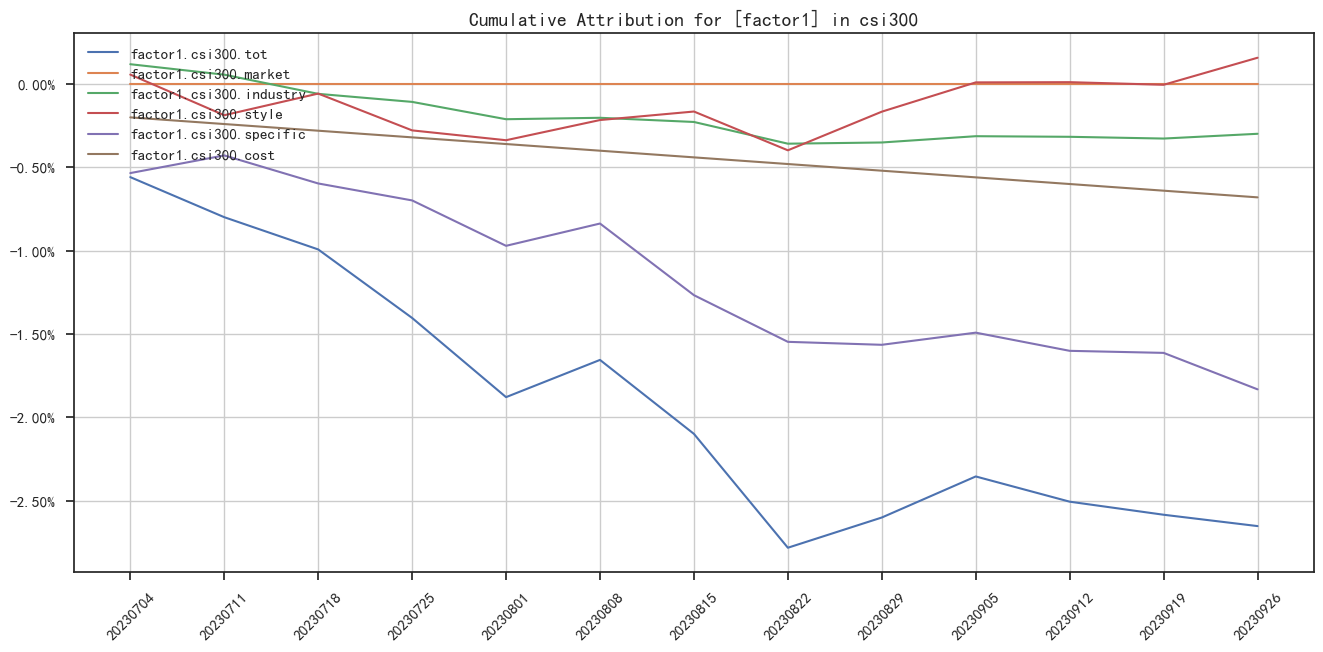

In [12]:
def calc_fmp_attrib_curve(account : pd.DataFrame):
    index_cols = ['factor_name','benchmark','trade_date']
    df = account[account['lag']==0].loc[:,index_cols + ['attribution']].\
        set_index(index_cols).groupby(index_cols)['attribution'].\
        apply(lambda x:x.iloc[0].source.loc[:,['contribution']].rename_axis('source')).\
        pivot_table('contribution' , index_cols , columns='source').rename_axis(None , axis='columns').\
        loc[:,['tot' , 'excess' , 'market' , 'industry' , 'style' , 'specific' , 'cost']]
    df = df.groupby(['factor_name','benchmark']).cumsum()
    return df.reset_index()

@multi_factor_plot
def plot_fmp_attrib_curve(df : pd.DataFrame , factor_name : Optional[str] = None , benchmark : Optional[str] = None , show = False):
    df , fig = plot_head(df , factor_name , benchmark)

    ax = fig.add_subplot(111)
    df = df.set_index('trade_date').round(6)
    for col in ['tot' , 'market' , 'industry' , 'style' , 'specific' , 'cost']: 
        ax.plot(df.index , df[col], label=f'{factor_name}.{benchmark}.{col}')

    ax.grid()
    ax.legend(loc = 'upper left')
    ax.yaxis.set_major_formatter(FuncFormatter(pct_fmt))
    plot_tail(f'Cumulative Attribution' , factor_name , benchmark , show , suptitle = False)
    return fig

rslt = calc_fmp_attrib_curve(df)
a = plot_fmp_attrib_curve(rslt)
a['factor1']['csi300']

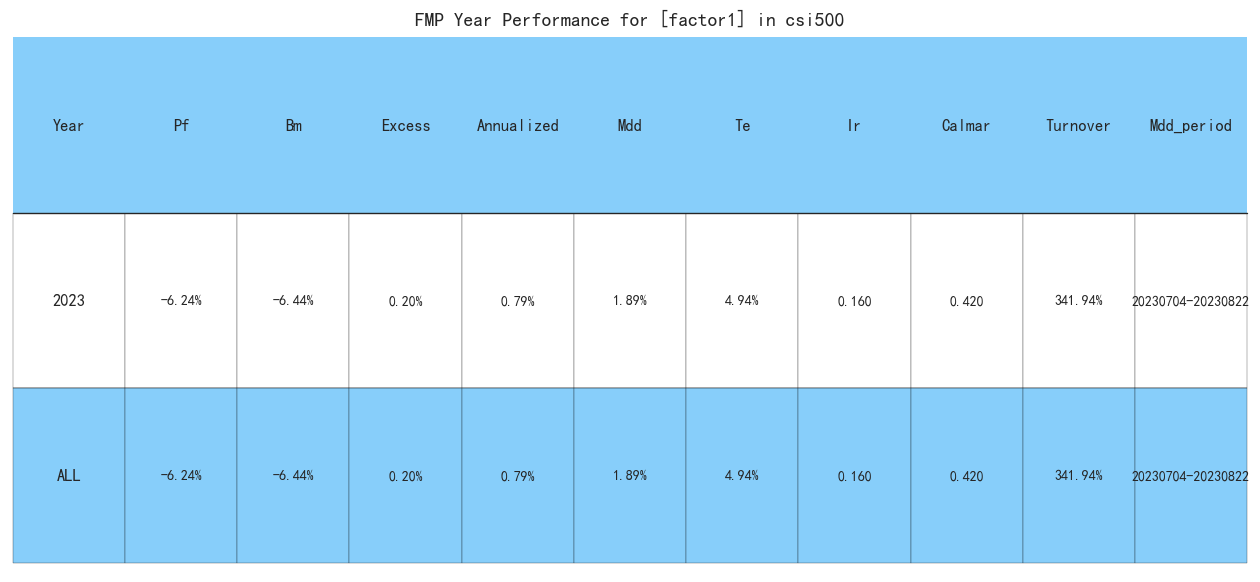

In [2]:
from src.factor.fmp.stat import calc_fmp_perf_year
from src.factor.fmp.plot import plot_fmp_perf_year

rslt = calc_fmp_perf_year(df)
a = plot_fmp_perf_year(rslt)
a['factor1']['csi500']

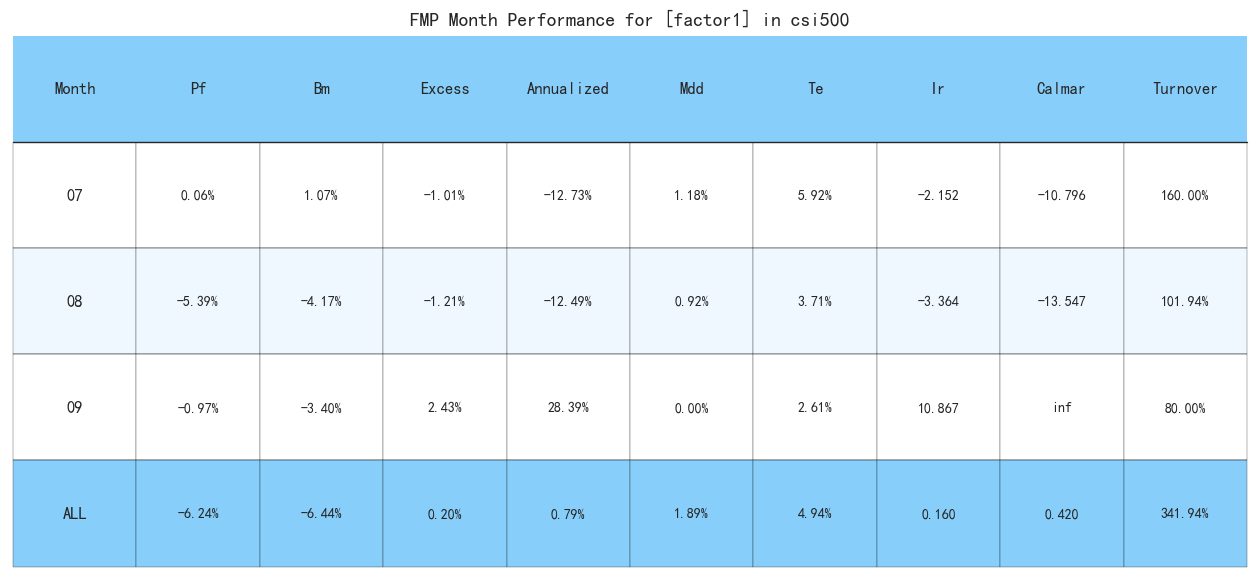

In [3]:
from src.factor.fmp.stat import calc_fmp_perf_month
from src.factor.fmp.plot import plot_fmp_perf_month

rslt = calc_fmp_perf_month(df)
a = plot_fmp_perf_month(rslt)
a['factor1']['csi500']

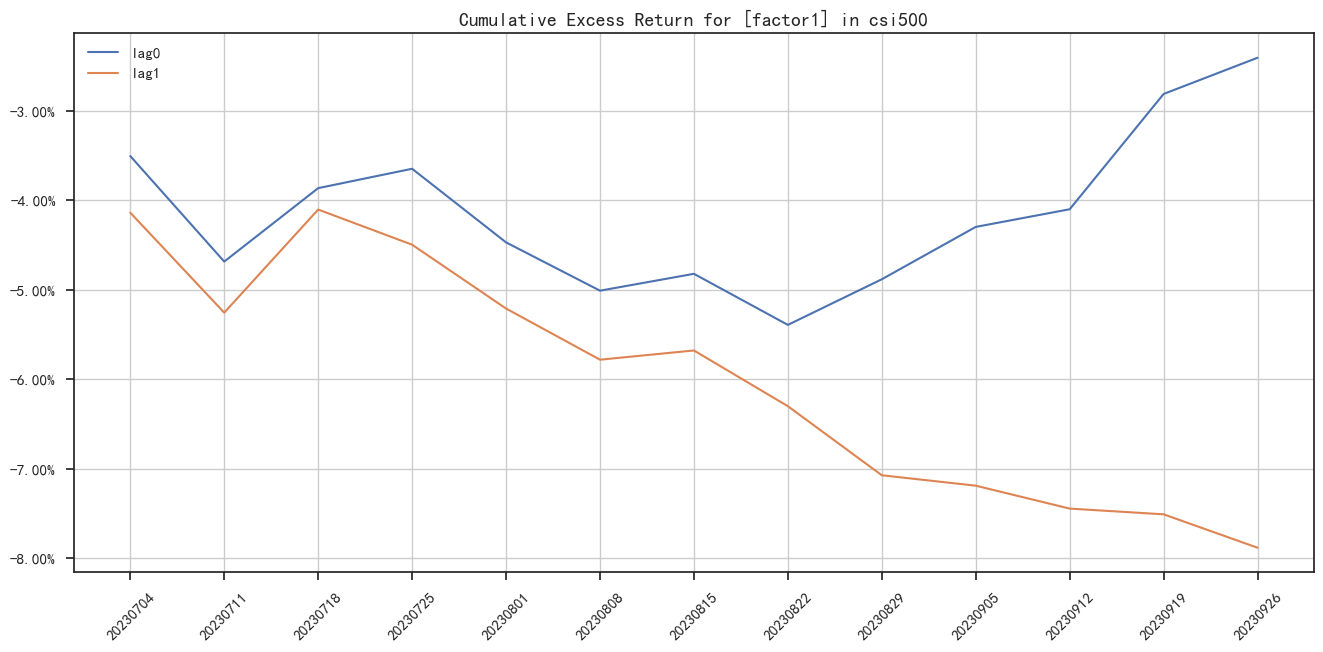

In [7]:
from src.factor.fmp.stat import calc_fmp_lag_curve
from src.factor.fmp.plot import plot_fmp_lag_curve

rslt = calc_fmp_lag_curve(df)
a = plot_fmp_lag_curve(rslt)
a['factor1']['csi500']

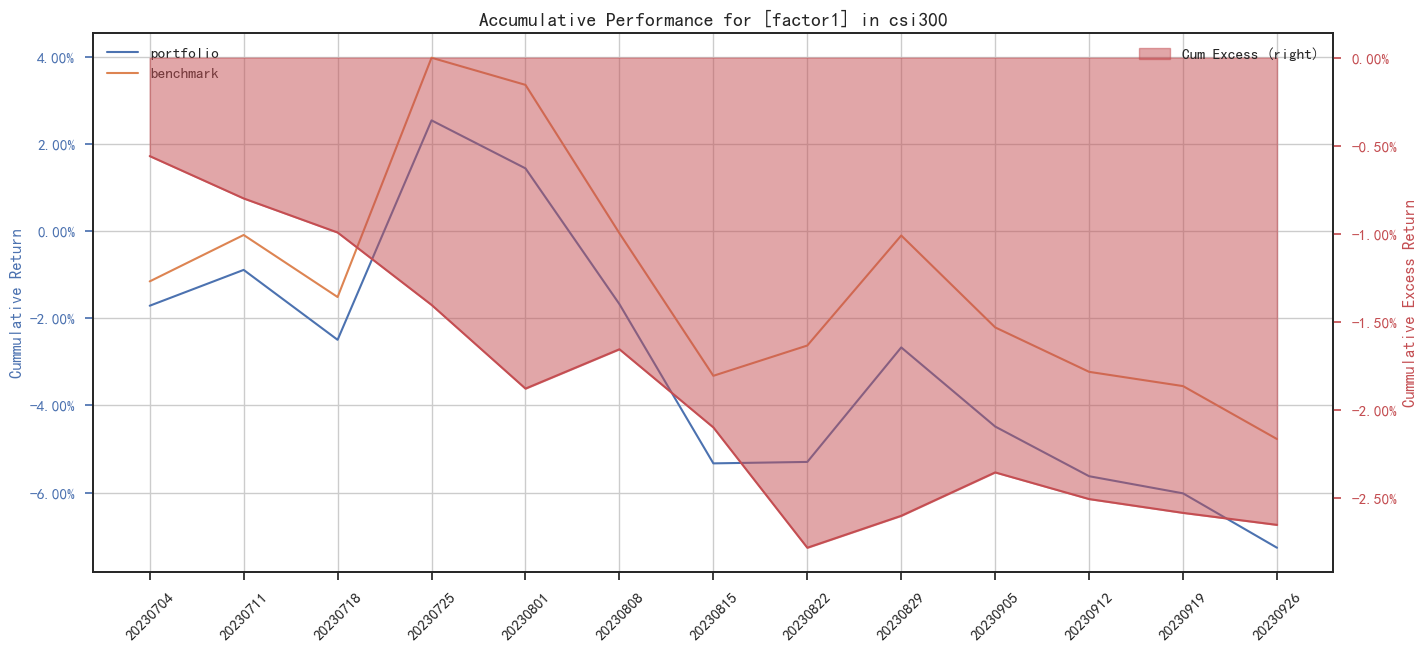

In [8]:
from src.factor.fmp.stat import calc_fmp_perf_curve
from src.factor.fmp.plot import plot_fmp_perf_curve

rslt = calc_fmp_perf_curve(df)
a = plot_fmp_perf_curve(rslt)
a['factor1']['csi300']

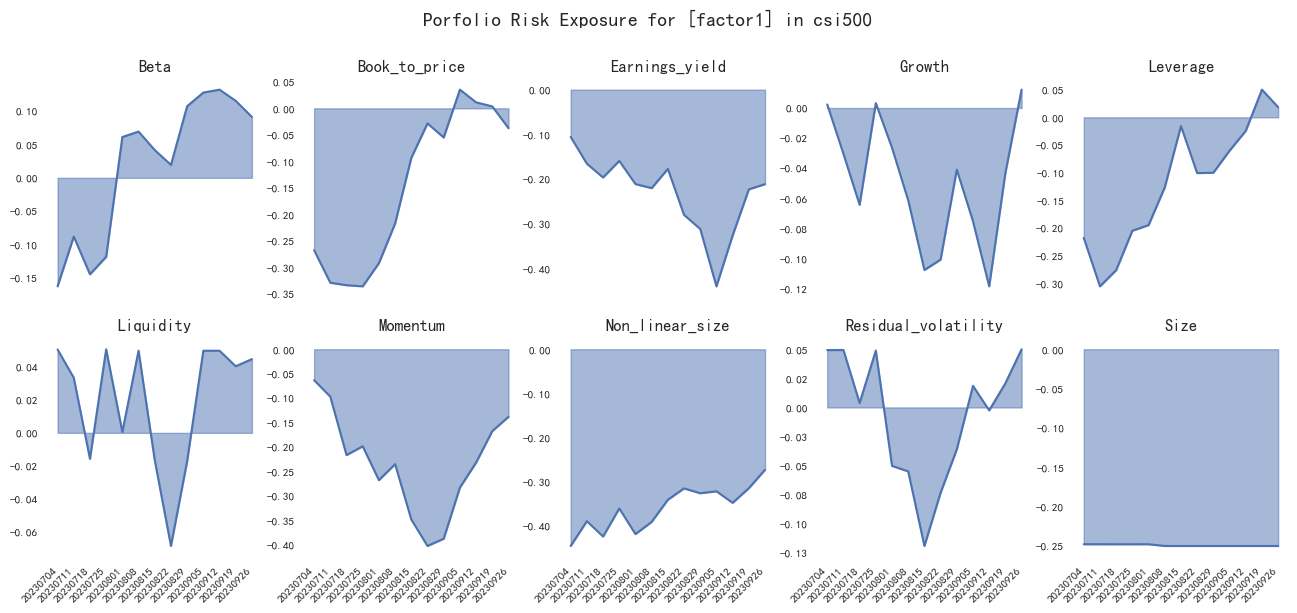

In [11]:
from src.factor.fmp.stat import calc_fmp_style_exp
from src.factor.fmp.plot import plot_fmp_style_exp

rslt = calc_fmp_style_exp(df)
a = plot_fmp_style_exp(rslt)
a['factor1']['csi500']

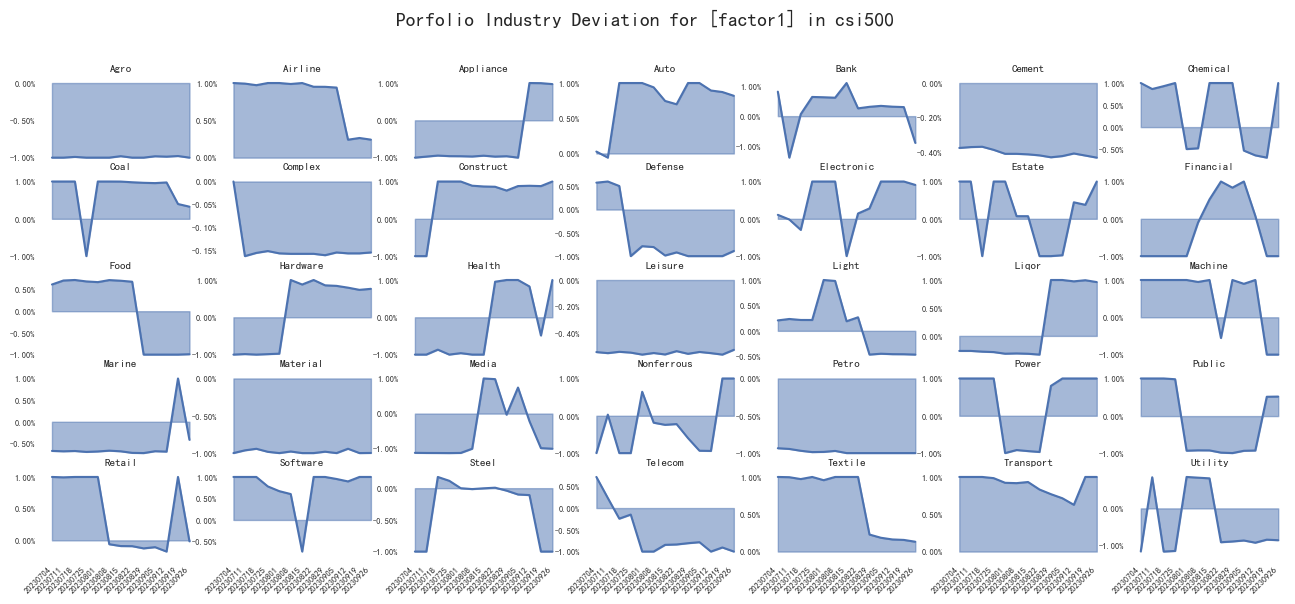

In [10]:
from src.factor.fmp.stat import calc_fmp_industry_exp
from src.factor.fmp.plot import plot_fmp_industry_exp

rslt = calc_fmp_industry_exp(df)
a = plot_fmp_industry_exp(rslt)
a['factor1']['csi500']

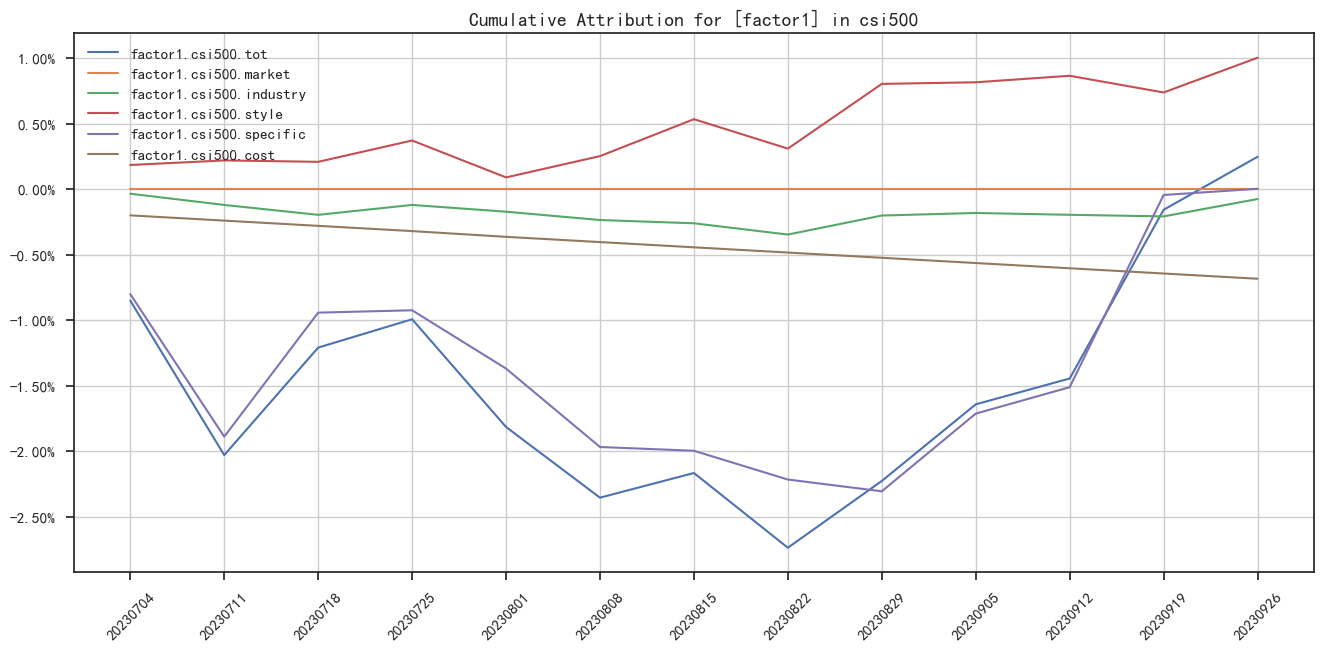

In [9]:
from src.factor.fmp.stat import calc_fmp_attrib_curve
from src.factor.fmp.plot import plot_fmp_attrib_curve

rslt = calc_fmp_attrib_curve(df)
a = plot_fmp_attrib_curve(rslt)
a['factor1']['csi500']

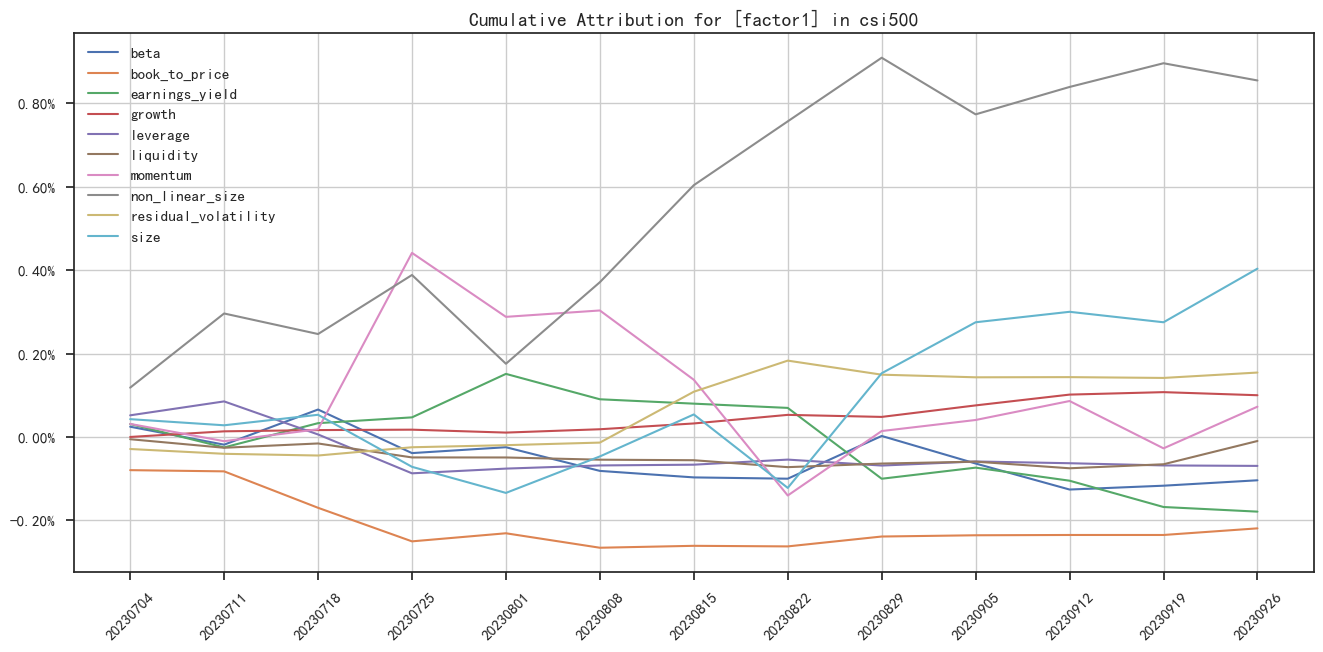

In [12]:
from src.factor.fmp.stat import calc_fmp_style_attrib_curve
from src.factor.fmp.plot import plot_fmp_style_attrib_curve

rslt = calc_fmp_style_attrib_curve(df)
a = plot_fmp_style_attrib_curve(rslt)
a['factor1']['csi500']